### 데이터 확인

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'

In [109]:
df = pd.read_csv("./data/한국가스공사_시간별 공급량_20181231.csv", encoding='cp949')
df

,연월일,시간,구분,공급량(톤)
0,2013-01-01,1,A,2497.129
1,2013-01-01,2,A,2363.265
2,2013-01-01,3,A,2258.505
3,2013-01-01,4,A,2243.969
4,2013-01-01,5,A,2344.105
...,...,...,...,...
368083,2018-12-31,20,H,681.033
368084,2018-12-31,21,H,669.961
368085,2018-12-31,22,H,657.941
368086,2018-12-31,23,H,610.953


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368088 entries, 0 to 368087
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   연월일     368088 non-null  object 
 1   시간      368088 non-null  int64  
 2   구분      368088 non-null  object 
 3   공급량(톤)  368088 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 11.2+ MB


In [4]:
# 0-1: 1, 1-2: 2,,,

df['시간'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [5]:
# 지역으로 추정

df['구분'].unique()

array(['A', 'B', 'C', 'D', 'E', 'G', 'H'], dtype=object)

In [6]:
# 공급량(예측값)의 분포 확인

df['공급량(톤)'].describe()

count    368088.000000
mean        948.100037
std         927.211578
min           1.378000
25%         221.973000
50%         637.014000
75%        1398.919000
max       11593.617000
Name: 공급량(톤), dtype: float64

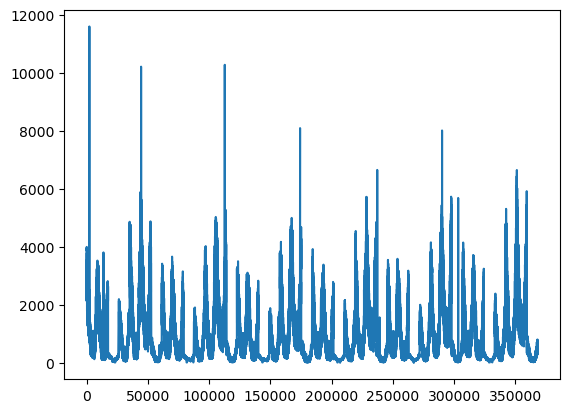

In [7]:
# 공급량 시각화

plt.plot(df['공급량(톤)'])
plt.show()

### 데이터 재확인 - 그래프로 확인

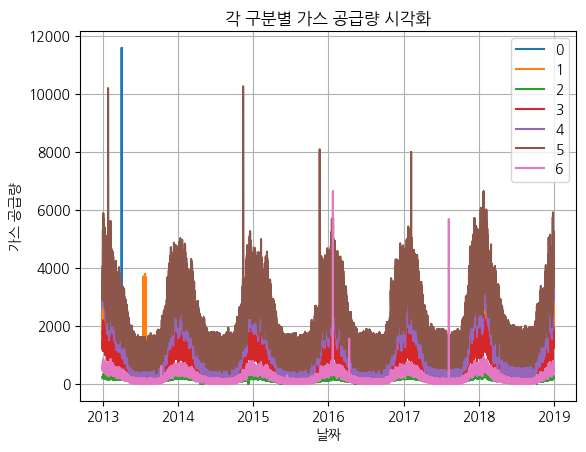

In [41]:
# 각 구분별로 그래프 시각화
for category, data in df.groupby('구분'):
    plt.plot(data['연월일'], data['공급량(톤)'], label=category)

plt.title('각 구분별 가스 공급량 시각화')
plt.xlabel('날짜')
plt.ylabel('가스 공급량')
plt.legend()
plt.grid(True)
plt.show()

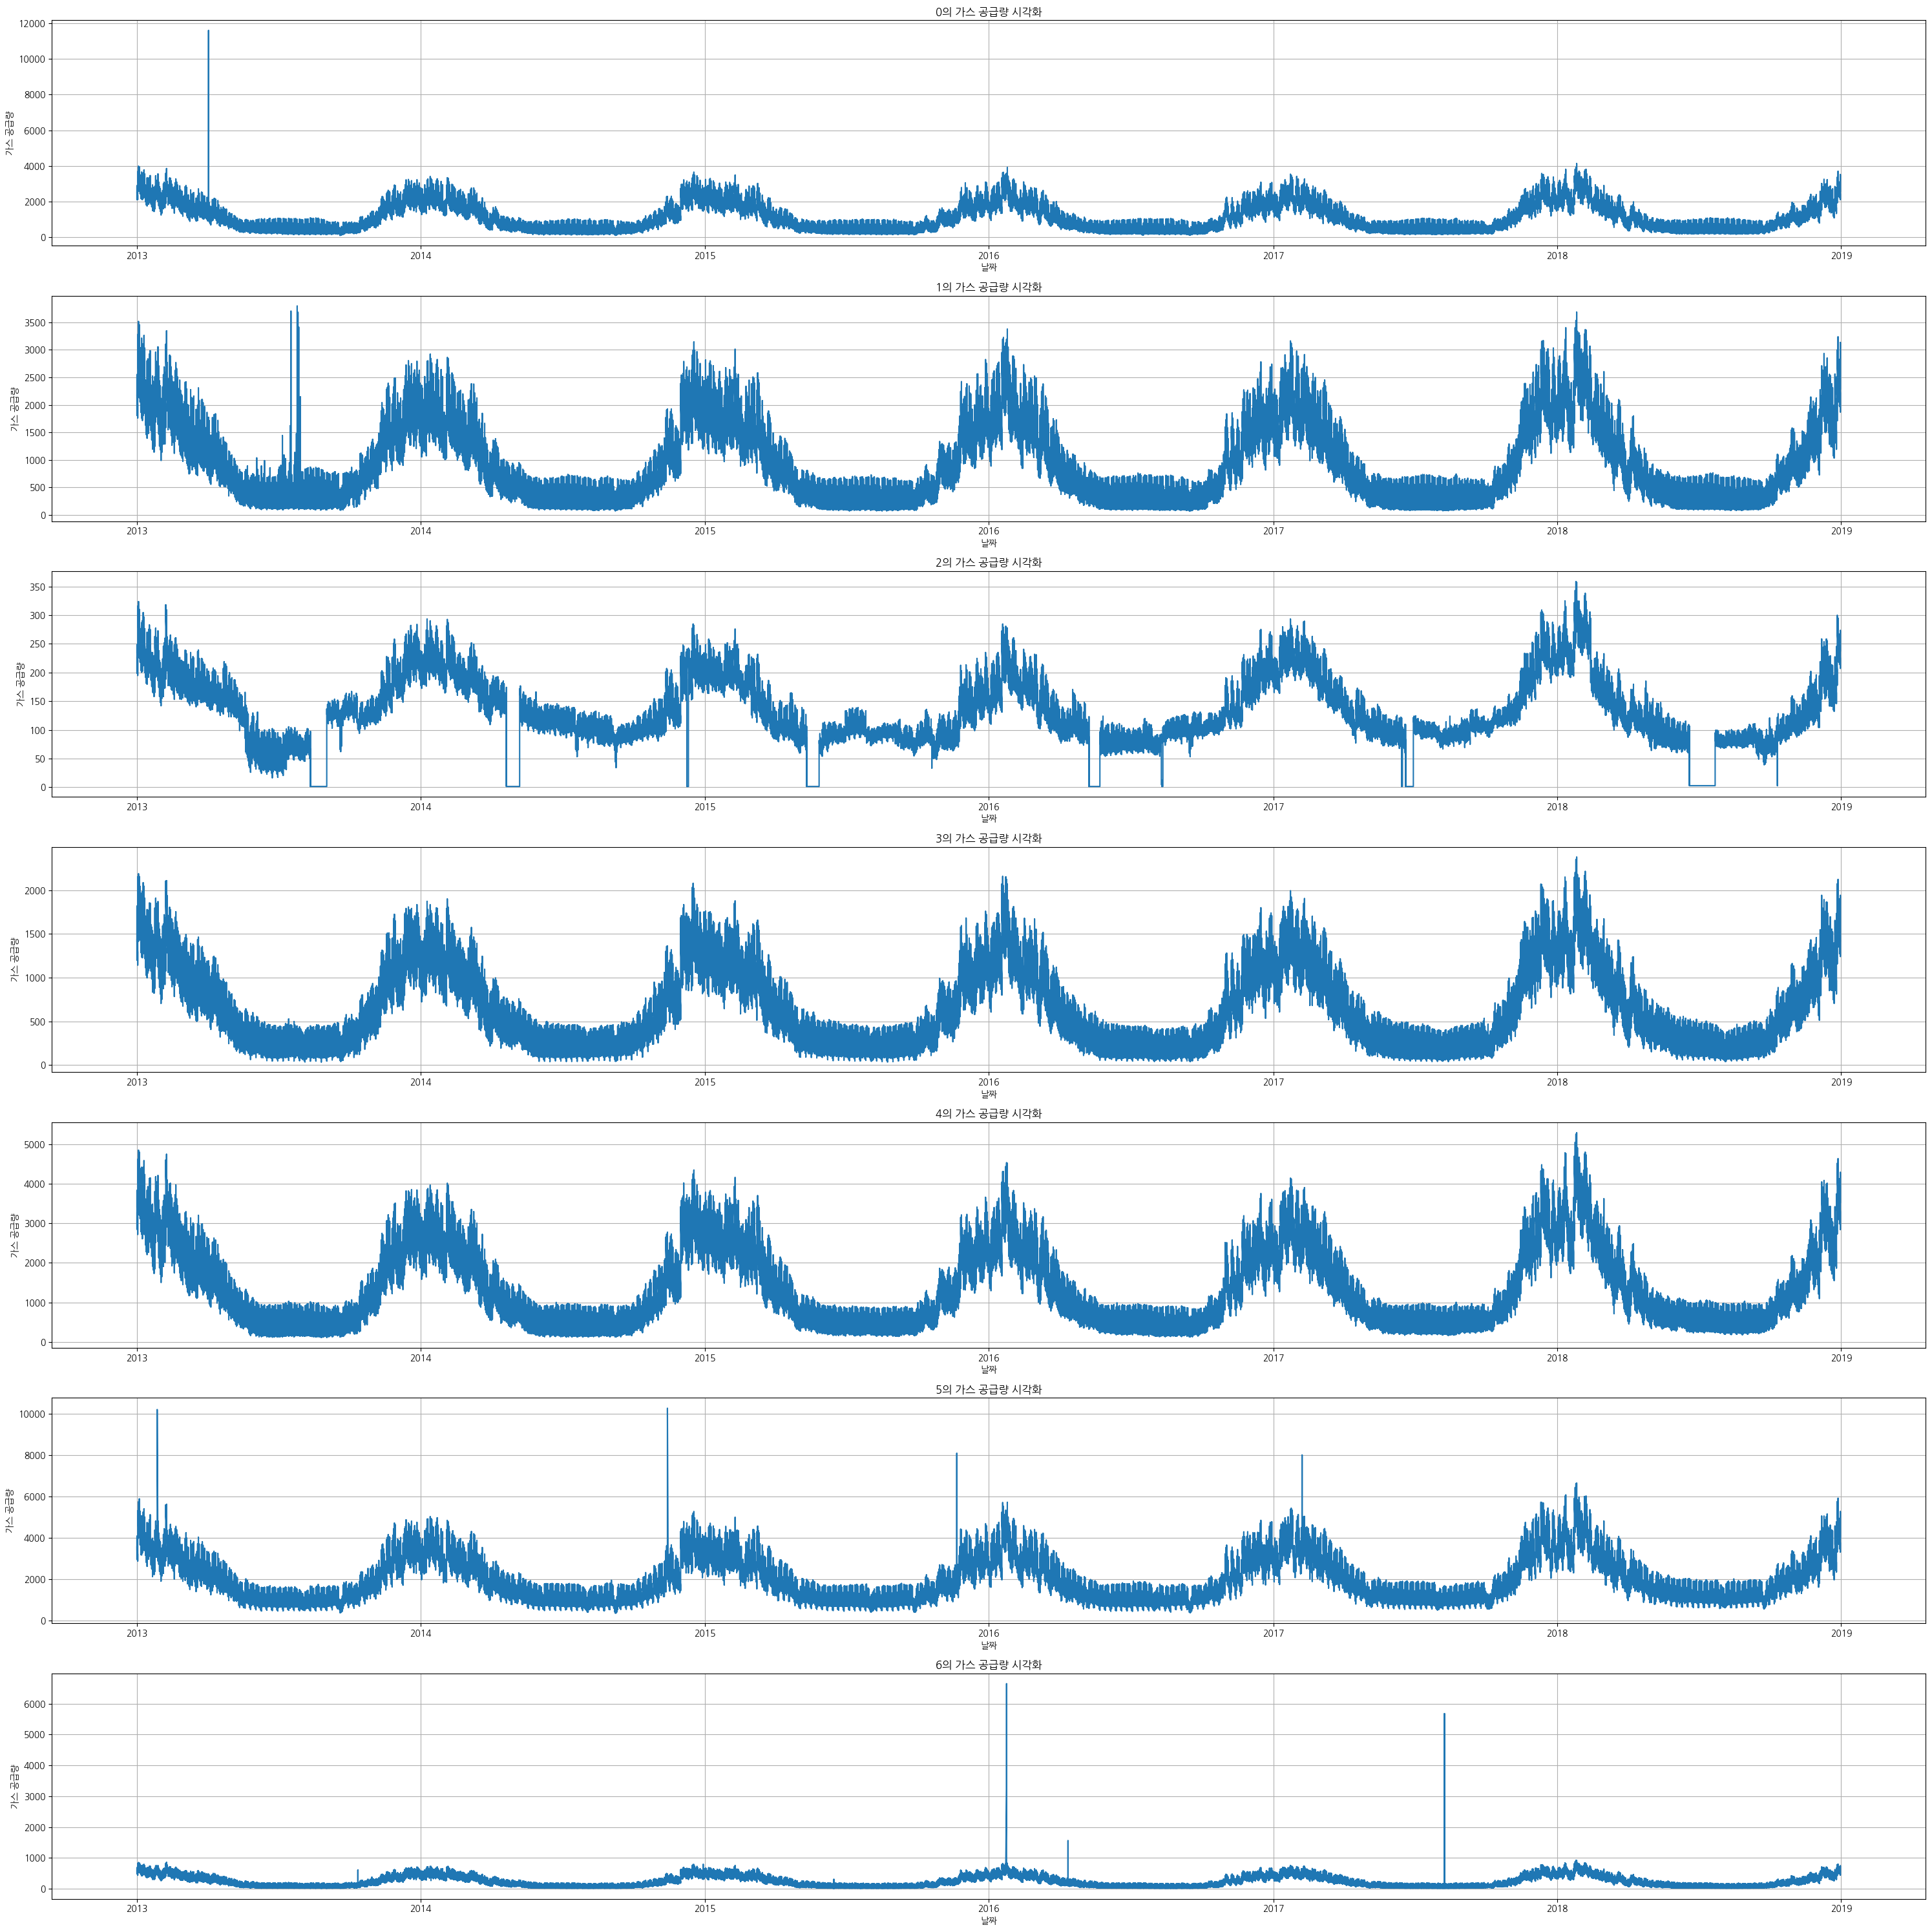

In [46]:
# 각 구분별로 패턴을 띄고 있음을 보임

fig, axes = plt.subplots(nrows=len(df['구분'].unique()), figsize=(30, 30))

for i, (category, data) in enumerate(df.groupby('구분')):
    ax = axes[i]
    ax.plot(data['연월일'], data['공급량(톤)'])
    ax.set_title(f'{category}의 가스 공급량 시각화')
    ax.set_xlabel('날짜')
    ax.set_ylabel('가스 공급량')
    ax.grid(True)

plt.tight_layout()
plt.show()

### 전처리

In [8]:
import numpy as np

from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import MinMaxScaler

In [110]:
# 구분 알파벳 -> 숫자로 라벨링

lbe = LabelEncoder()
df['구분'] = lbe.fit_transform(df['구분'])

In [10]:
df['구분'].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [111]:
# 연월일 dateime으로 형변환 후 연/월/일/요일 로 컬럼 나누기
# weekday - 요일 반환(0-6: 월-일)

df['연월일'] = pd.to_datetime(df['연월일'])
df['year'] = df['연월일'].dt.year
df['month'] = df['연월일'].dt.month
df['day'] = df['연월일'].dt.day
df['weekday'] = df['연월일'].dt.weekday

In [12]:
df.head()

,연월일,시간,구분,공급량(톤),year,month,day,weekday
0,2013-01-01,1,0,2497.129,2013,1,1,1
1,2013-01-01,2,0,2363.265,2013,1,1,1
2,2013-01-01,3,0,2258.505,2013,1,1,1
3,2013-01-01,4,0,2243.969,2013,1,1,1
4,2013-01-01,5,0,2344.105,2013,1,1,1


In [13]:
# 연도 확인
df['year'].unique()

array([2013, 2014, 2015, 2016, 2017, 2018])

In [14]:
df.tail()

,연월일,시간,구분,공급량(톤),year,month,day,weekday
368083,2018-12-31,20,6,681.033,2018,12,31,0
368084,2018-12-31,21,6,669.961,2018,12,31,0
368085,2018-12-31,22,6,657.941,2018,12,31,0
368086,2018-12-31,23,6,610.953,2018,12,31,0
368087,2018-12-31,24,6,560.896,2018,12,31,0


In [15]:
df.loc[306767]

연월일        2017-12-31 00:00:00
시간                          24
구분                           6
공급량(톤)                 444.618
year                      2017
month                       12
day                         31
weekday                      6
Name: 306767, dtype: object

In [16]:
### 2018년의 데이터 test 데이터로 사용하기 위하여 2018-01-01이 시작되는 row의 인덱스 값 확인
# 306768

df[df['연월일'] == '20180101']

,연월일,시간,구분,공급량(톤),year,month,day,weekday
306768,2018-01-01,1,0,1765.008,2018,1,1,0
306769,2018-01-01,2,0,1679.186,2018,1,1,0
306770,2018-01-01,3,0,1610.885,2018,1,1,0
306771,2018-01-01,4,0,1604.123,2018,1,1,0
306772,2018-01-01,5,0,1711.506,2018,1,1,0
...,...,...,...,...,...,...,...,...
359347,2018-01-01,20,6,556.857,2018,1,1,0
359348,2018-01-01,21,6,556.502,2018,1,1,0
359349,2018-01-01,22,6,545.146,2018,1,1,0
359350,2018-01-01,23,6,496.522,2018,1,1,0


In [112]:
# feature로 사용할 변수 채택
# 범주형 데이터를 제외한 공급량 값을 minmaxscaler를 통해 전처리
# train-test split 후 scale 하는 것으로 변경

dfx = df[['구분', 'month', 'day', 'weekday', '시간', '공급량(톤)']]

# scaler = MinMaxScaler()
# dfx['공급량(톤)'] = scaler.fit_transform(dfx[['공급량(톤)']])

dfx

,구분,month,day,weekday,시간,공급량(톤)
0,0,1,1,1,1,2497.129
1,0,1,1,1,2,2363.265
2,0,1,1,1,3,2258.505
3,0,1,1,1,4,2243.969
4,0,1,1,1,5,2344.105
...,...,...,...,...,...,...
368083,6,12,31,0,20,681.033
368084,6,12,31,0,21,669.961
368085,6,12,31,0,22,657.941
368086,6,12,31,0,23,610.953


In [113]:
dfy = dfx[['공급량(톤)']] # 예측값
dfx = dfx[['구분', 'month', 'day', 'weekday', '시간']]

x = dfx.values.tolist()
y = dfy.values.tolist()

In [84]:
# LSTM 모델에 맞도록 input 데이터 전처리(시퀀스 데이터화)
# 우선 일주일(7일)의 데이터로 다음날의 공급량을 예측할 수 있게 전처리

window_size = 7
data_x, data_y = [], []

for i in range(len(y) - window_size):
    _x = x[i:i+window_size]
    _y = y[i+window_size]
    data_x.append(_x)
    data_y.append(_y)


In [85]:
# 위에서 구한 2018년 전까지의 데이터(2013-2017) 인덱스
train_size = 306768
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

# test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_x.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_x.shape, test_y.shape)

훈련 데이터의 크기 : (306768, 7, 5) (306768, 1)
테스트 데이터의 크기 : (61313, 7, 5) (61313, 1)


In [86]:
# train 데이터의 통계값으로 스케일링 된 데이터로 모델 학습
# test 데이터도 tarin 데이터 통계량 이용(min, max값) 해서 스케일 되어야함
# → train,test 나누고 train min,max값으로 스케일 적용하기

MIN = train_y.min()
MAX = train_y.max()
print(MIN, MAX)

1.378 11593.617


In [87]:
def MinMaxScale(array, min, max):

    return (array - min) / (max - min)

In [88]:
train_y = MinMaxScale(train_y, MIN, MAX)
test_y = MinMaxScale(test_y, MIN, MAX)

In [89]:
pd.Series(train_y.ravel()).describe()

count    306768.000000
mean          0.080526
std           0.078436
min           0.000000
25%           0.018771
50%           0.054153
75%           0.119201
max           1.000000
dtype: float64

In [90]:
pd.Series(test_y.ravel()).describe()

count    61313.000000
mean         0.087374
std          0.087099
min          0.000119
25%          0.020295
50%          0.058529
75%          0.127713
max          0.572820
dtype: float64

### 모델 학습

In [21]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import mean_squared_error, mean_absolute_error

#### - layer 1개

unit 20 / activation = tanh / optimizer = SGD / loss = mse / metrics = mae

epoch 63에서 조기종료

test MSE 0.0013

test MAE 0.0246

In [67]:
# lstm 레이어 하나만 사용
# 성능 개선 없을 경우를 위해 조기 멈춤 사용
# val_loss, val_mae 사용가능

early= EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model = Sequential()
model.add(LSTM(units=20,activation='tanh',input_shape=(7,5)))
model.add(Dense(1))

model.compile(optimizer='SGD', loss='mean_squared_error', metrics=['mae'])

In [70]:
model.fit(train_x, train_y, epochs=100, validation_split=0.2, callbacks=[early])

Epoch 1/100
7670/7670 [==============================] - 14s 2ms/step - loss: 0.0040 - mae: 0.0470 - val_loss: 0.0046 - val_mae: 0.0493
Epoch 2/100
7670/7670 [==============================] - 13s 2ms/step - loss: 0.0039 - mae: 0.0468 - val_loss: 0.0049 - val_mae: 0.0506
Epoch 3/100
7670/7670 [==============================] - 14s 2ms/step - loss: 0.0039 - mae: 0.0464 - val_loss: 0.0045 - val_mae: 0.0485
Epoch 4/100
7670/7670 [==============================] - 14s 2ms/step - loss: 0.0038 - mae: 0.0458 - val_loss: 0.0043 - val_mae: 0.0479
Epoch 5/100
7670/7670 [==============================] - 14s 2ms/step - loss: 0.0036 - mae: 0.0447 - val_loss: 0.0041 - val_mae: 0.0465
Epoch 6/100
7670/7670 [==============================] - 14s 2ms/step - loss: 0.0034 - mae: 0.0435 - val_loss: 0.0040 - val_mae: 0.0477
Epoch 7/100
7670/7670 [==============================] - 14s 2ms/step - loss: 0.0032 - mae: 0.0422 - val_loss: 0.0037 - val_mae: 0.0458
Epoch 8/100
7670/7670 [=========================

In [71]:
pred_y = model.predict(test_x)

1917/1917 [==============================] - 1s 656us/step


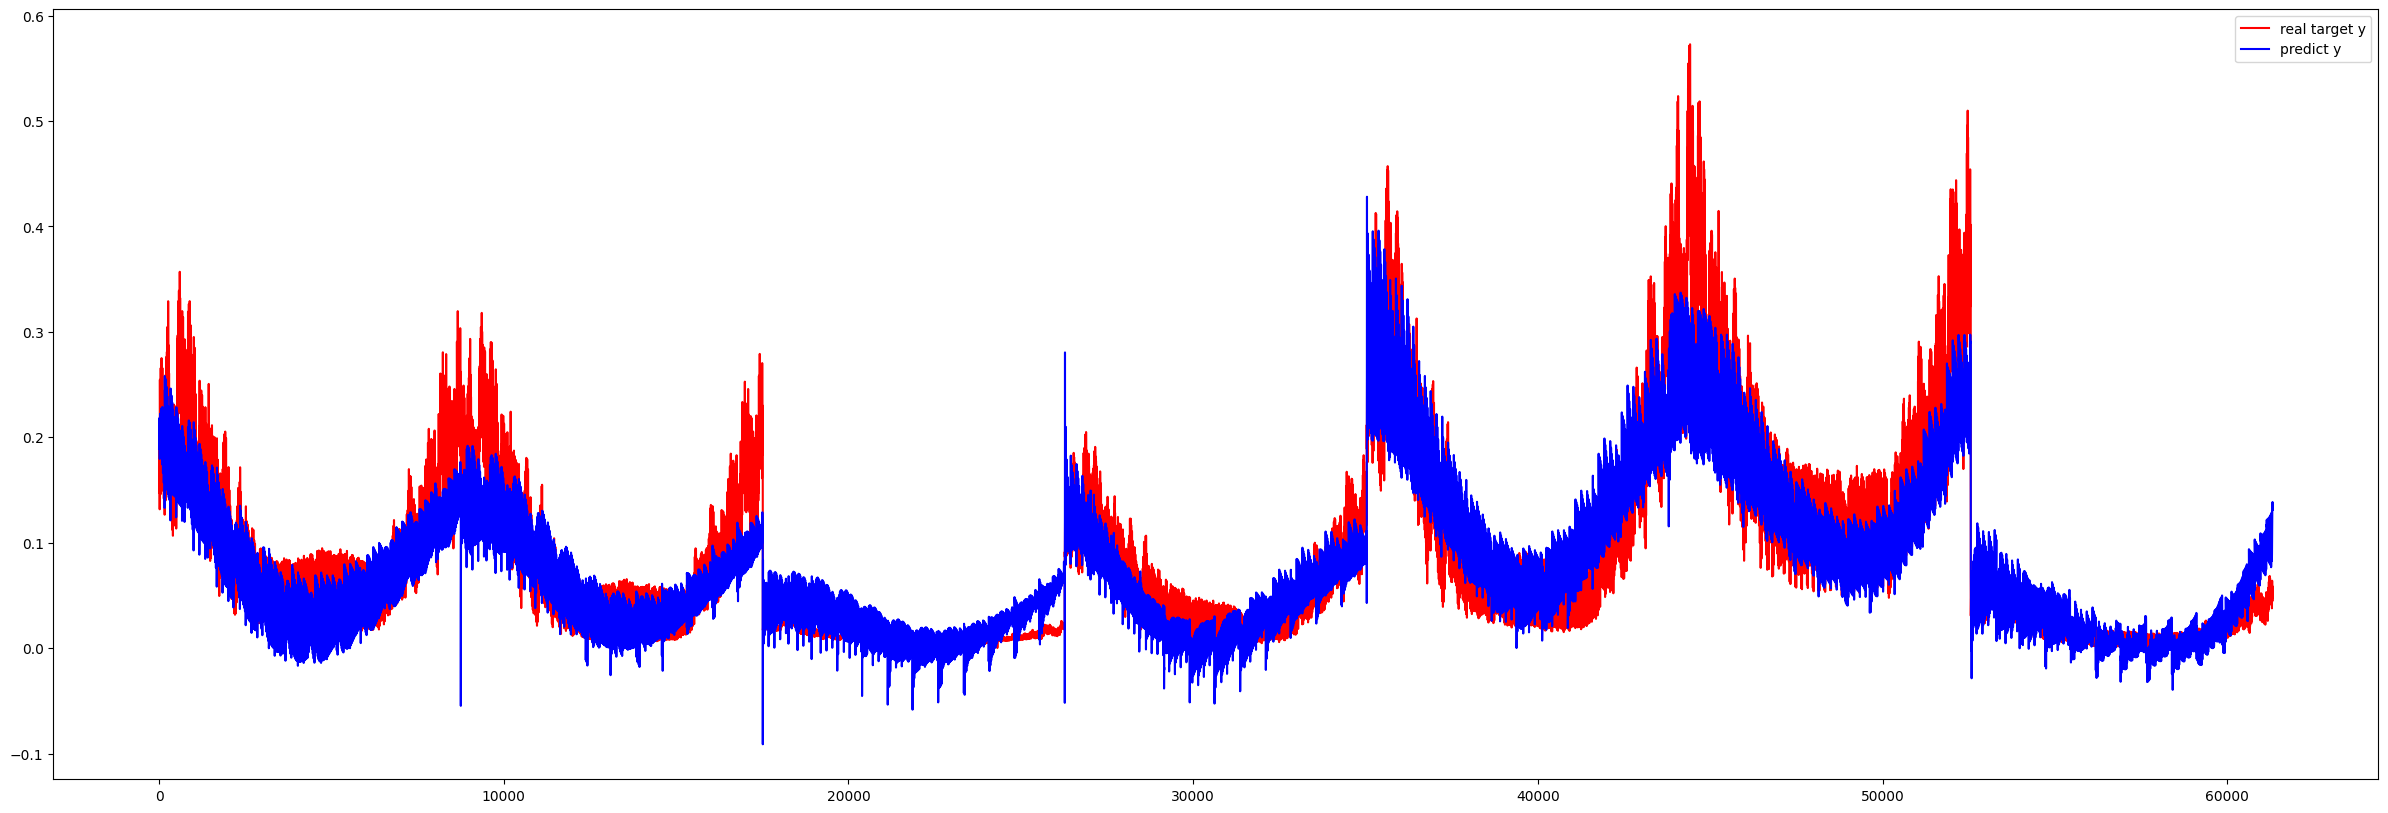

In [75]:
# 실제값, 예측값 비교

plt.figure(figsize=(30, 10))
plt.plot(test_y, color='red', label='real target y')
plt.plot(pred_y, color='blue', label='predict y')
plt.legend()
plt.show()

In [80]:
print("test MSE", round(mean_squared_error(test_y, pred_y), 4))
print("test MAE", round(mean_absolute_error(test_y, pred_y), 4))

test MSE 0.0013
test MAE 0.0246


#### - layer 3개

layer 2개 추가

unit 20,20,20 / activation = tanh / optimizer = adam / loss = mse / metrics = mae

epoch 12에서 조기종료

test MSE 0.0005

test MAE 0.0129

In [130]:
# layer 2개 추가
# unit 20,20,20 / activation = tanh / optimizer = adam / loss = mse / metrics = mae

early= EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model2 = Sequential()
model2.add(LSTM(units=20, activation='tanh', return_sequences=True, input_shape=(7,5)))
model2.add(LSTM(units=20, activation='tanh', return_sequences=True))
model2.add(LSTM(units=20, activation='tanh'))
model2.add(Dense(1))

model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [131]:
model2.fit(train_x, train_y, epochs=100, validation_split=0.2, callbacks=[early])

Epoch 1/100
7670/7670 [==============================] - 36s 4ms/step - loss: 0.0028 - mae: 0.0363 - val_loss: 6.7510e-04 - val_mae: 0.0161
Epoch 2/100
7670/7670 [==============================] - 33s 4ms/step - loss: 4.1692e-04 - mae: 0.0129 - val_loss: 5.5341e-04 - val_mae: 0.0138
Epoch 3/100
7670/7670 [==============================] - 33s 4ms/step - loss: 3.5096e-04 - mae: 0.0115 - val_loss: 5.2358e-04 - val_mae: 0.0133
Epoch 4/100
7670/7670 [==============================] - 33s 4ms/step - loss: 3.3182e-04 - mae: 0.0110 - val_loss: 5.0183e-04 - val_mae: 0.0123
Epoch 5/100
7670/7670 [==============================] - 34s 4ms/step - loss: 3.0562e-04 - mae: 0.0105 - val_loss: 4.9214e-04 - val_mae: 0.0121
Epoch 6/100
7670/7670 [==============================] - 33s 4ms/step - loss: 2.9572e-04 - mae: 0.0103 - val_loss: 4.7030e-04 - val_mae: 0.0120
Epoch 7/100
7670/7670 [==============================] - 32s 4ms/step - loss: 2.9155e-04 - mae: 0.0102 - val_loss: 3.9305e-04 - val_mae: 0.0

In [132]:
pred_y2 = model2.predict(test_x)

1917/1917 [==============================] - 3s 1ms/step


In [133]:
print("test MSE", round(mean_squared_error(test_y, pred_y2), 4))
print("test MAE", round(mean_absolute_error(test_y, pred_y2), 4))

test MSE 0.0005
test MAE 0.0129


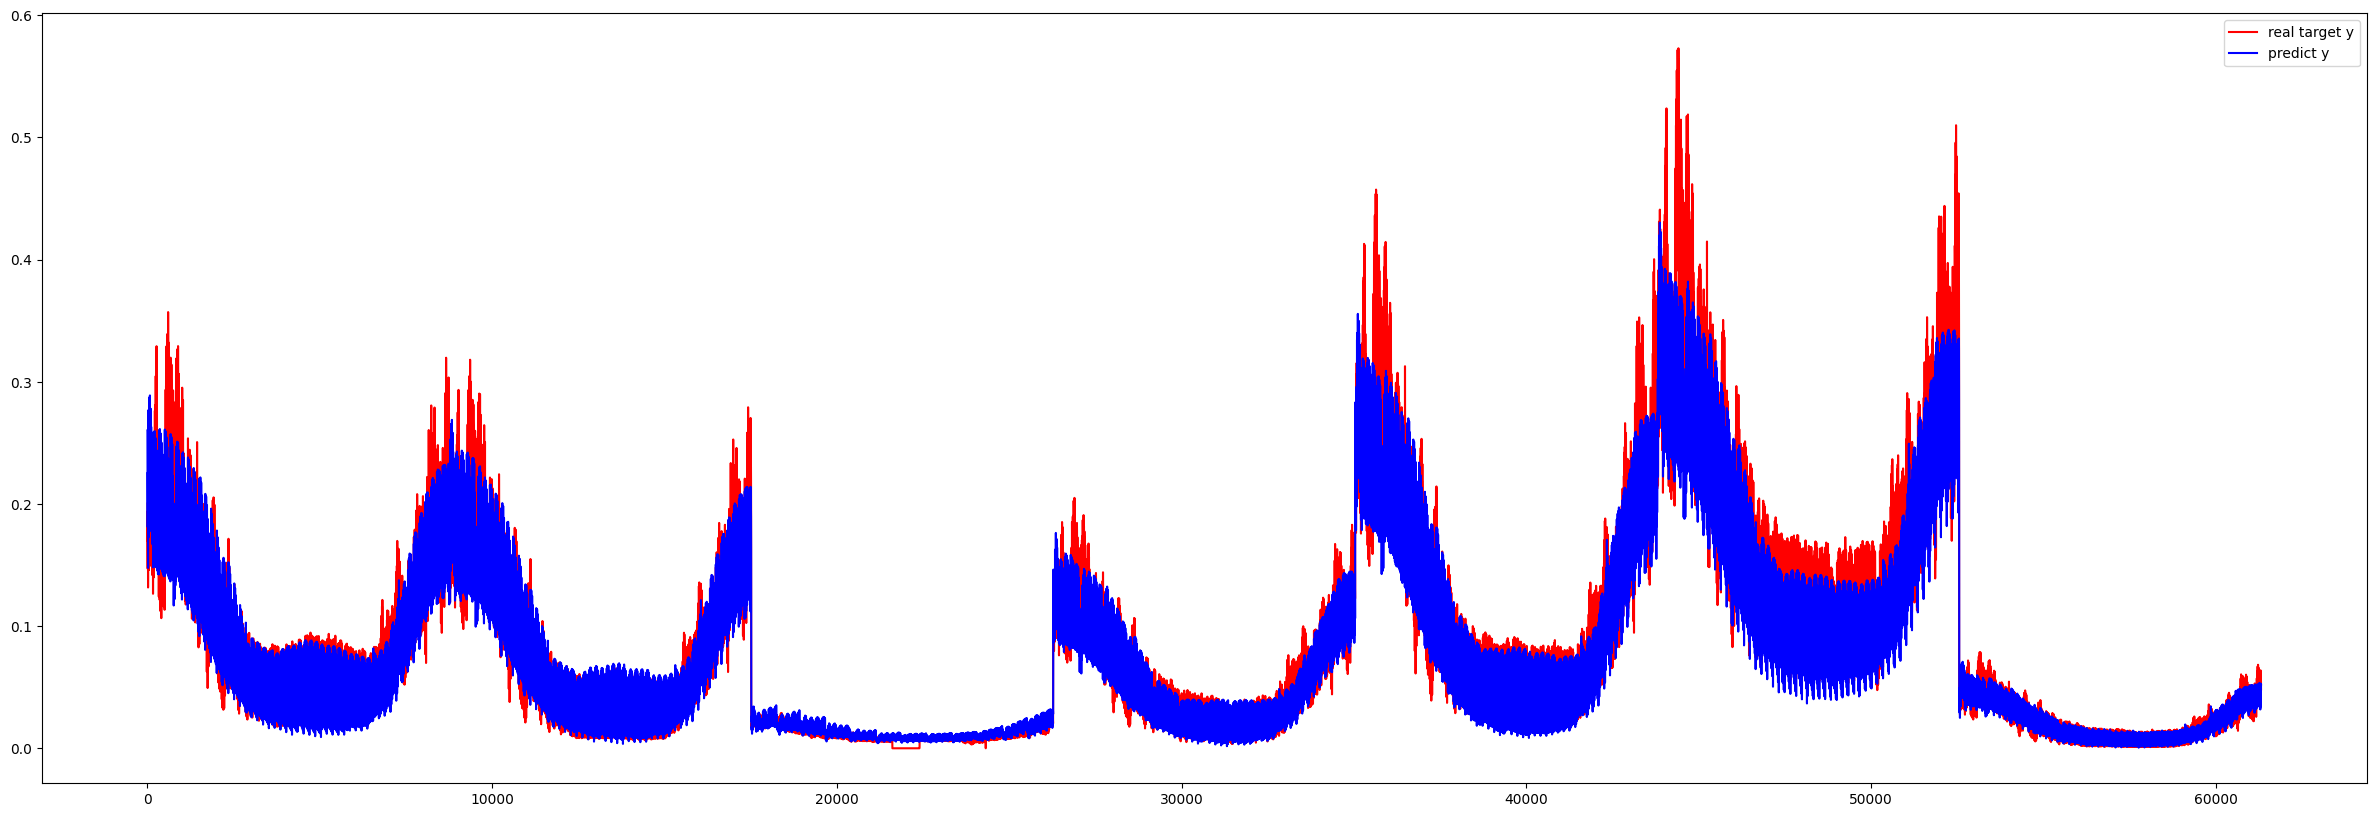

In [134]:
# 실제값, 예측값 비교

plt.figure(figsize=(30, 10))
plt.plot(test_y, color='red', label='real target y')
plt.plot(pred_y2, color='blue', label='predict y')
plt.legend()
plt.show()

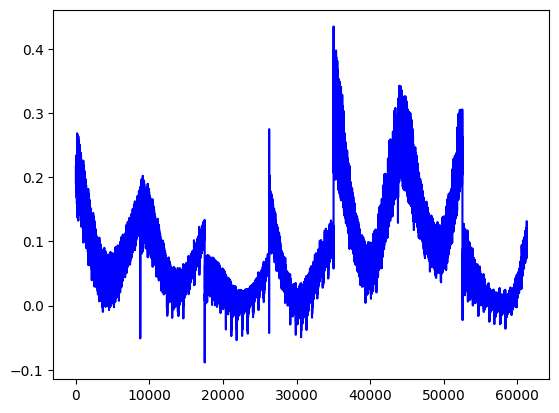

In [92]:
# 첫번째 모델(lstm1) 결과
plt.plot(pred_y, color='blue', label='predict y')

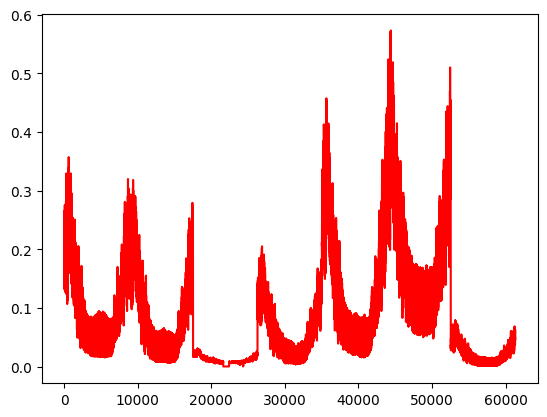

In [91]:
#실제 테스트 데이터 결과
plt.plot(test_y, color='red', label='real target y')

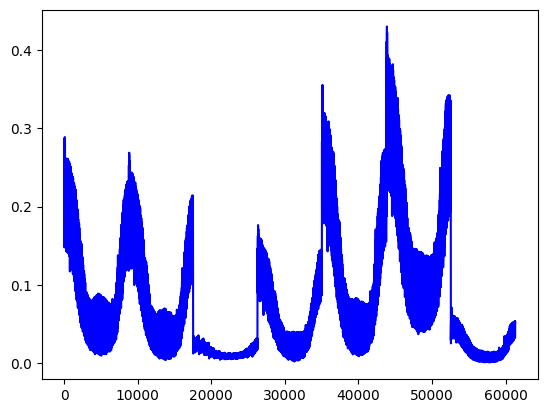

In [135]:
# 두번째 모델(lstm3) 결과
plt.plot(pred_y2, color='blue', label='predict y')

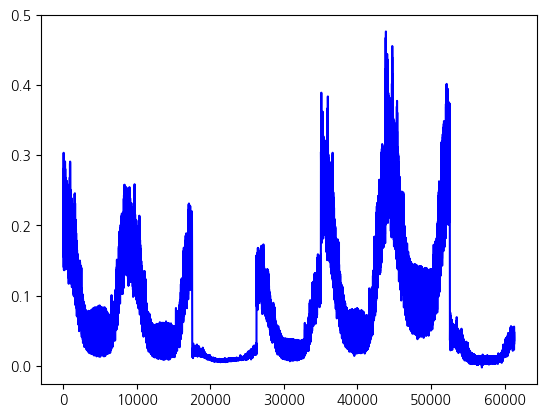

In [58]:
# 네번째 모델(lstm3+40) 결과
plt.plot(pred_y4, color='blue', label='predict y')

#### 원래 예측값으로 변환해서 확인하기

In [136]:
# 예측된 값을 스케일링된 값에서 원래 값으로 변환
pred_y2_original = scaler.inverse_transform(pred_y2)
test_y_original = scaler.inverse_transform(test_y)

In [137]:
# 예측된 값을 확인
print("스케일링된 예측값:", pred_y)
print("원래 데이터 예측값:", pred_y2_original)

스케일링된 예측값: [[0.19182956]
 [0.20170188]
 [0.2078228 ]
 ...
 [0.13004449]
 [0.12740058]
 [0.12339267]]
원래 데이터 예측값: [[3017.131 ]
 [3005.468 ]
 [2903.1133]
 ...
 [ 613.897 ]
 [ 611.9541]
 [ 608.3263]]


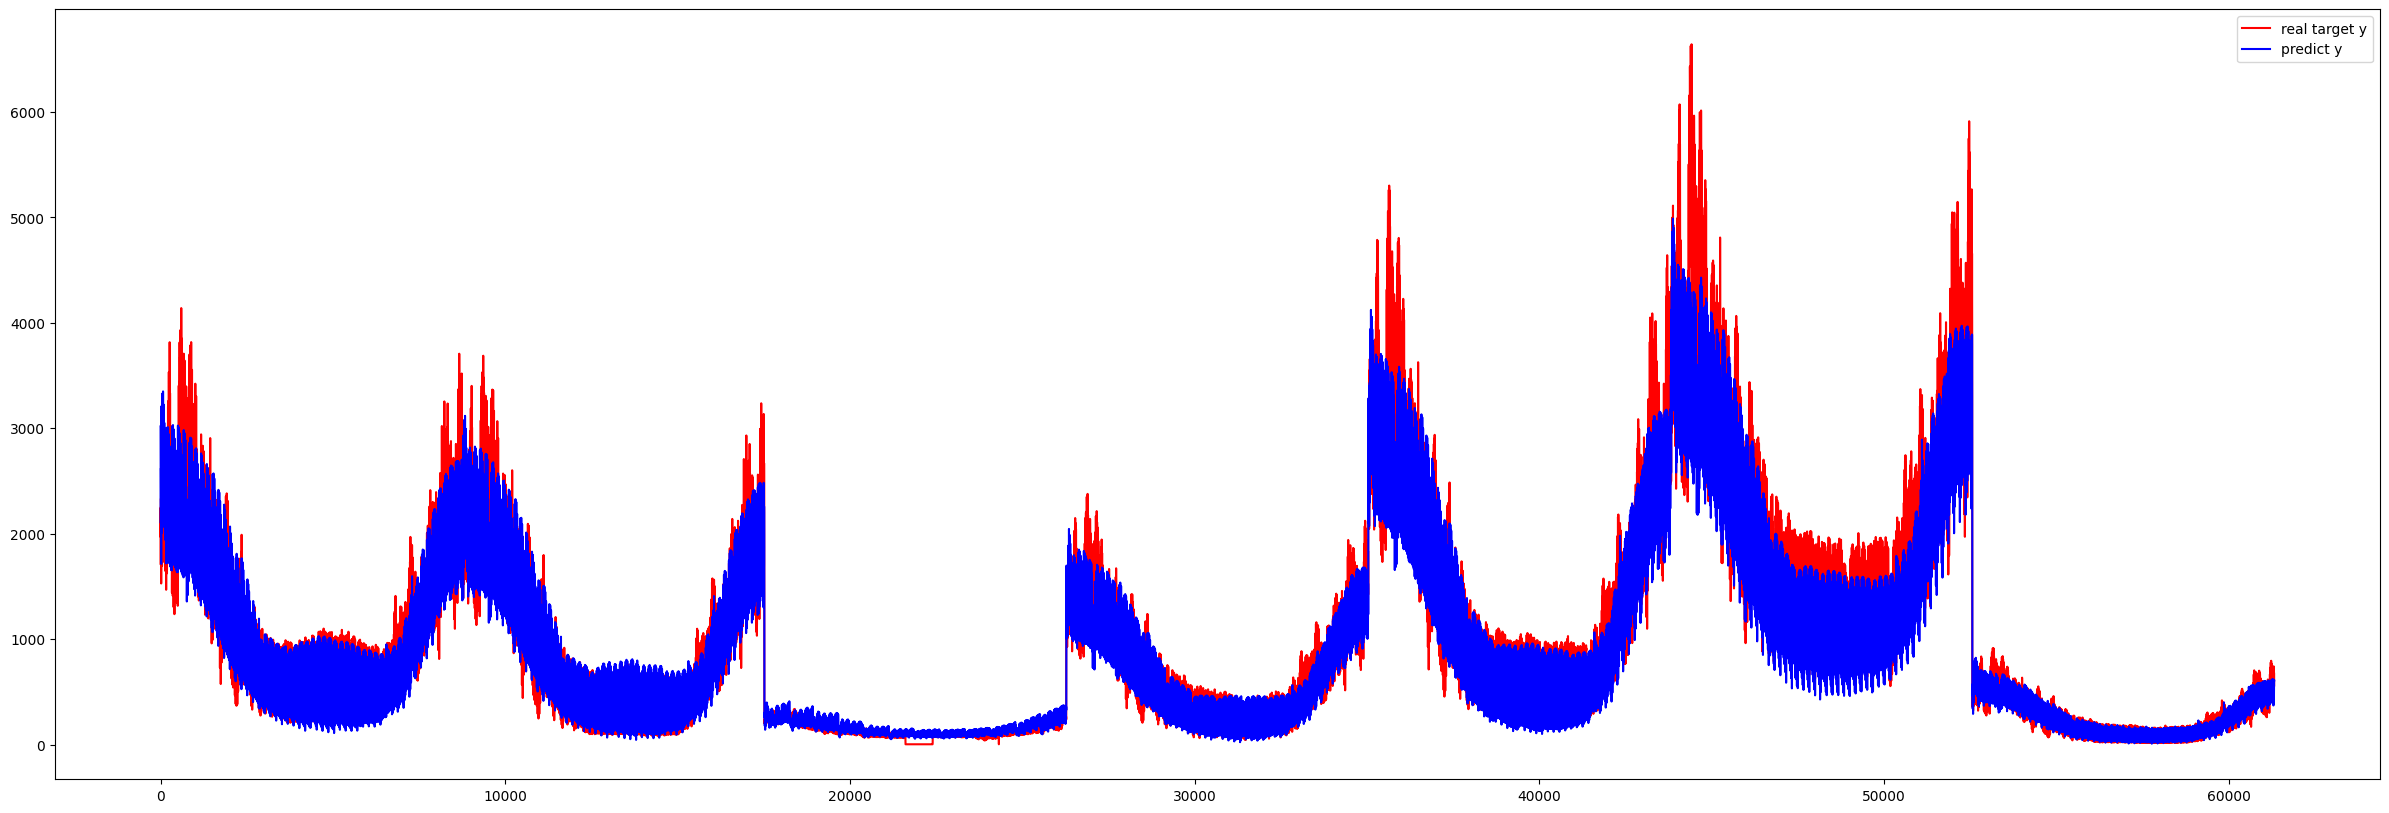

In [138]:
# 실제값, 예측값 비교 - 원래값으로

plt.figure(figsize=(30, 10))
plt.plot(test_y_original, color='red', label='real target y')
plt.plot(pred_y2_original, color='blue', label='predict y')
plt.legend()
plt.show()

### 전처리 다시 한 후 모델 학습

예측값(공급량) minmaxscale 하지 않고 input data로 설정

모델은 성능이 더 좋았던 lstm layer3개로 

---> 아예 예측이 되지 않음

In [98]:
dfx = df[['구분', 'month', 'day', 'weekday', '시간', '공급량(톤)']]
dfx

# 위 train, test 코드 그대로 사용

,구분,month,day,weekday,시간,공급량(톤)
0,0,1,1,1,1,2497.129
1,0,1,1,1,2,2363.265
2,0,1,1,1,3,2258.505
3,0,1,1,1,4,2243.969
4,0,1,1,1,5,2344.105
...,...,...,...,...,...,...
368083,6,12,31,0,20,681.033
368084,6,12,31,0,21,669.961
368085,6,12,31,0,22,657.941
368086,6,12,31,0,23,610.953


In [103]:
train_y

array([[2518.921],
       [2706.481],
       [2832.057],
       ...,
       [1711.506],
       [1734.519],
       [1797.623]])

In [104]:
early= EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model2 = Sequential()
model2.add(LSTM(units=20, activation='tanh', return_sequences=True, input_shape=(7,5)))
model2.add(LSTM(units=40, activation='tanh', return_sequences=True))
model2.add(LSTM(units=20, activation='tanh'))
model2.add(Dense(1))

model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [105]:
model2.fit(train_x, train_y, epochs=100, validation_split=0.2, callbacks=[early])

Epoch 1/100
7670/7670 [==============================] - 37s 5ms/step - loss: 1516474.0000 - mae: 847.6718 - val_loss: 1551102.5000 - val_mae: 820.5862
Epoch 2/100
7670/7670 [==============================] - 33s 4ms/step - loss: 1280334.3750 - mae: 746.4063 - val_loss: 1329624.6250 - val_mae: 745.9036
Epoch 3/100
7670/7670 [==============================] - 33s 4ms/step - loss: 1095410.5000 - mae: 689.8713 - val_loss: 1158743.5000 - val_mae: 704.0698
Epoch 4/100
7670/7670 [==============================] - 33s 4ms/step - loss: 959413.6875 - mae: 662.3707 - val_loss: 1036853.0625 - val_mae: 689.3317
Epoch 5/100
7670/7670 [==============================] - 33s 4ms/step - loss: 871131.3750 - mae: 658.7504 - val_loss: 961654.3750 - val_mae: 695.0701
Epoch 6/100
7670/7670 [==============================] - 33s 4ms/step - loss: 825206.1875 - mae: 671.2975 - val_loss: 926528.3750 - val_mae: 710.6008
Epoch 7/100
7670/7670 [==============================] - 33s 4ms/step - loss: 809334.3125 - m

In [106]:
pred_y3 = model2.predict(test_x)

1917/1917 [==============================] - 3s 1ms/step


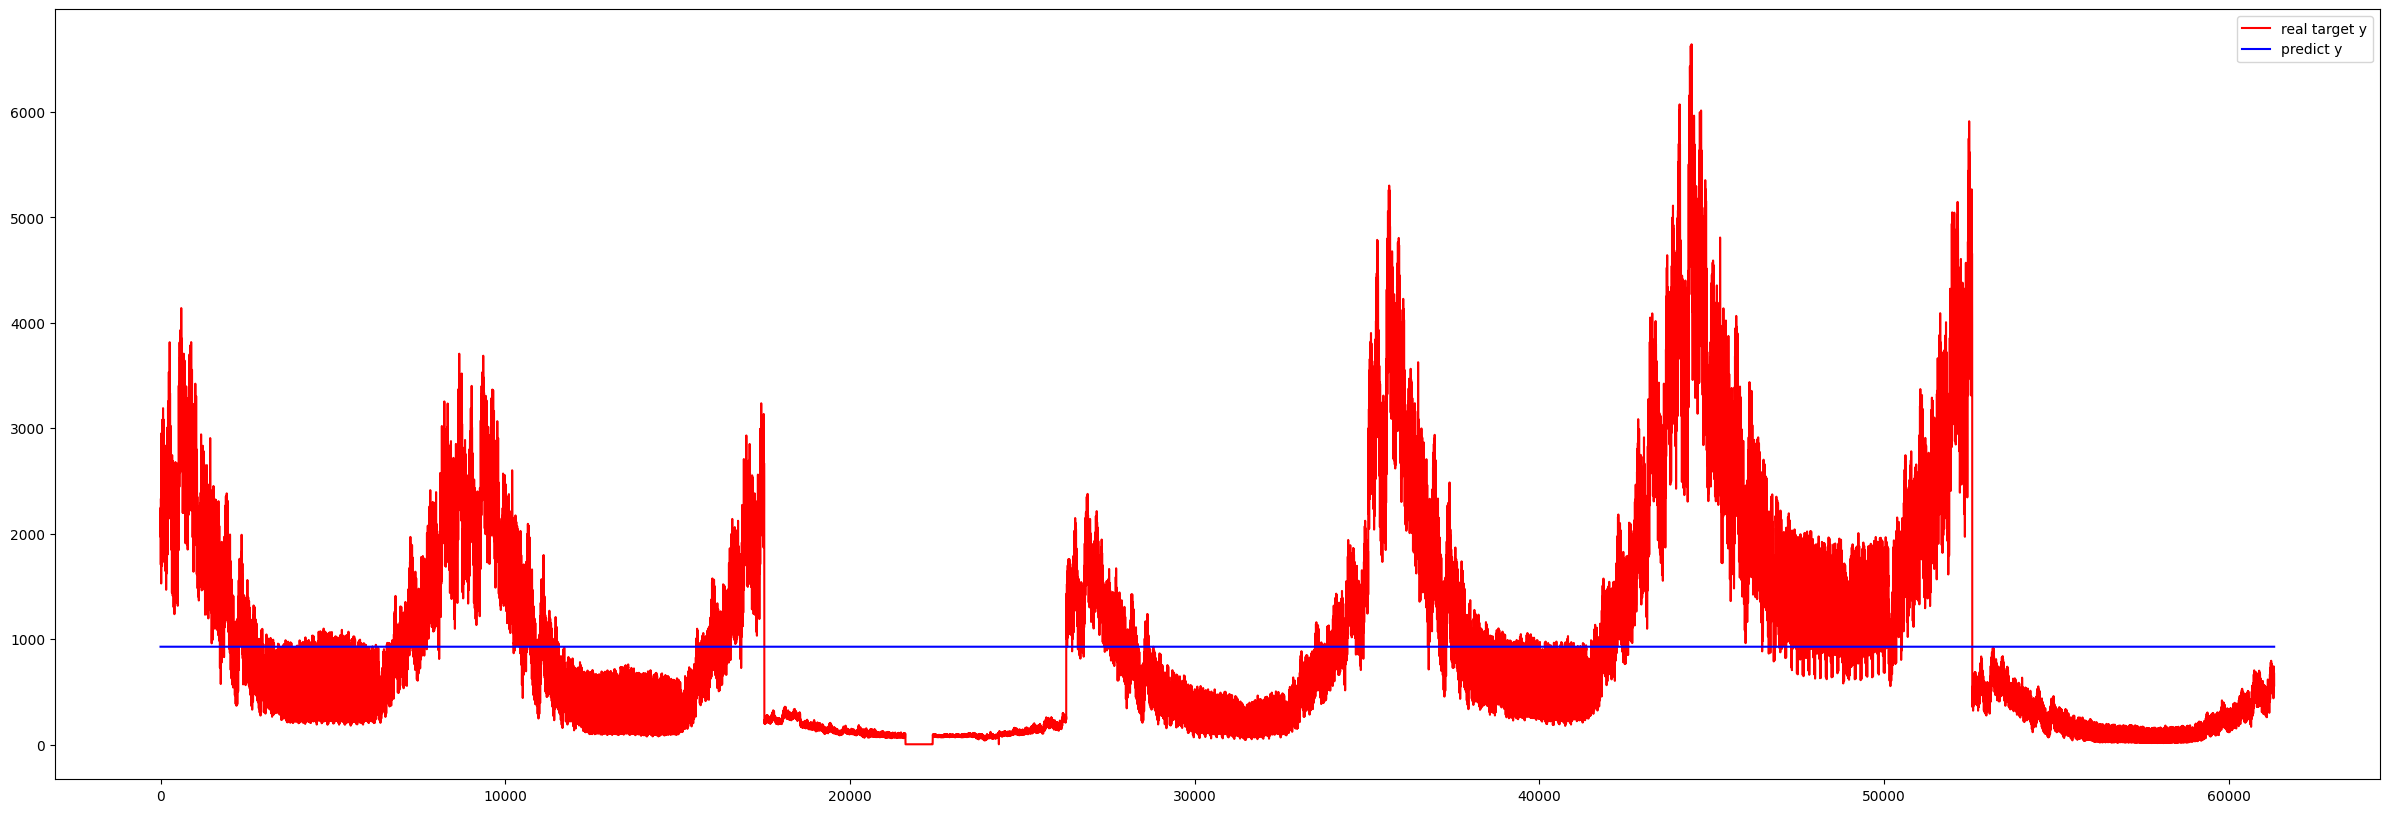

In [107]:
# 실제값, 예측값 비교
# 아예 예측이 안됨

plt.figure(figsize=(30, 10))
plt.plot(test_y, color='red', label='real target y')
plt.plot(pred_y3, color='blue', label='predict y')
plt.legend()
plt.show()

### 모델 재학습

#### - layer 5

layer 2개 더 추가

unit 20,20,20,20,20 / activation = tanh / optimizer = adam / loss = mse / metrics = mae

epoch 15에서 조기종료

test MSE 0.0005

test MAE 0.0125

In [32]:
early= EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model3 = Sequential()
model3.add(LSTM(units=20, activation='tanh', return_sequences=True, input_shape=(7,5)))
model3.add(LSTM(units=20, activation='tanh', return_sequences=True))
model3.add(LSTM(units=20, activation='tanh', return_sequences=True))
model3.add(LSTM(units=20, activation='tanh', return_sequences=True))
model3.add(LSTM(units=20, activation='tanh'))
model3.add(Dense(1))

model3.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [33]:
model3.fit(train_x, train_y, epochs=100, validation_split=0.2, callbacks=[early])


Epoch 1/100


7670/7670 [==============================] - 98s 12ms/step - loss: 0.0013 - mae: 0.0222 - val_loss: 0.0012 - val_mae: 0.0215
Epoch 2/100
7670/7670 [==============================] - 110s 14ms/step - loss: 3.7625e-04 - mae: 0.0118 - val_loss: 3.9343e-04 - val_mae: 0.0109
Epoch 3/100
7670/7670 [==============================] - 108s 14ms/step - loss: 3.4081e-04 - mae: 0.0110 - val_loss: 4.0965e-04 - val_mae: 0.0122
Epoch 4/100
7670/7670 [==============================] - 111s 14ms/step - loss: 3.1843e-04 - mae: 0.0106 - val_loss: 4.8867e-04 - val_mae: 0.0118
Epoch 5/100
7670/7670 [==============================] - 107s 14ms/step - loss: 3.2868e-04 - mae: 0.0106 - val_loss: 3.6279e-04 - val_mae: 0.0107
Epoch 6/100
7670/7670 [==============================] - 107s 14ms/step - loss: 2.9734e-04 - mae: 0.0102 - val_loss: 4.2312e-04 - val_mae: 0.0113
Epoch 7/100
7670/7670 [==============================] - 107s 14ms/step - loss: 3.0791e-04 - mae: 0.0102 - val_loss: 3.8900e-04 - v

In [34]:
pred_y3 = model3.predict(test_x)

1917/1917 [==============================] - 8s 3ms/step


In [35]:
print("test MSE", round(mean_squared_error(test_y, pred_y3), 4))
print("test MAE", round(mean_absolute_error(test_y, pred_y3), 4))

test MSE 0.0006
test MAE 0.0137


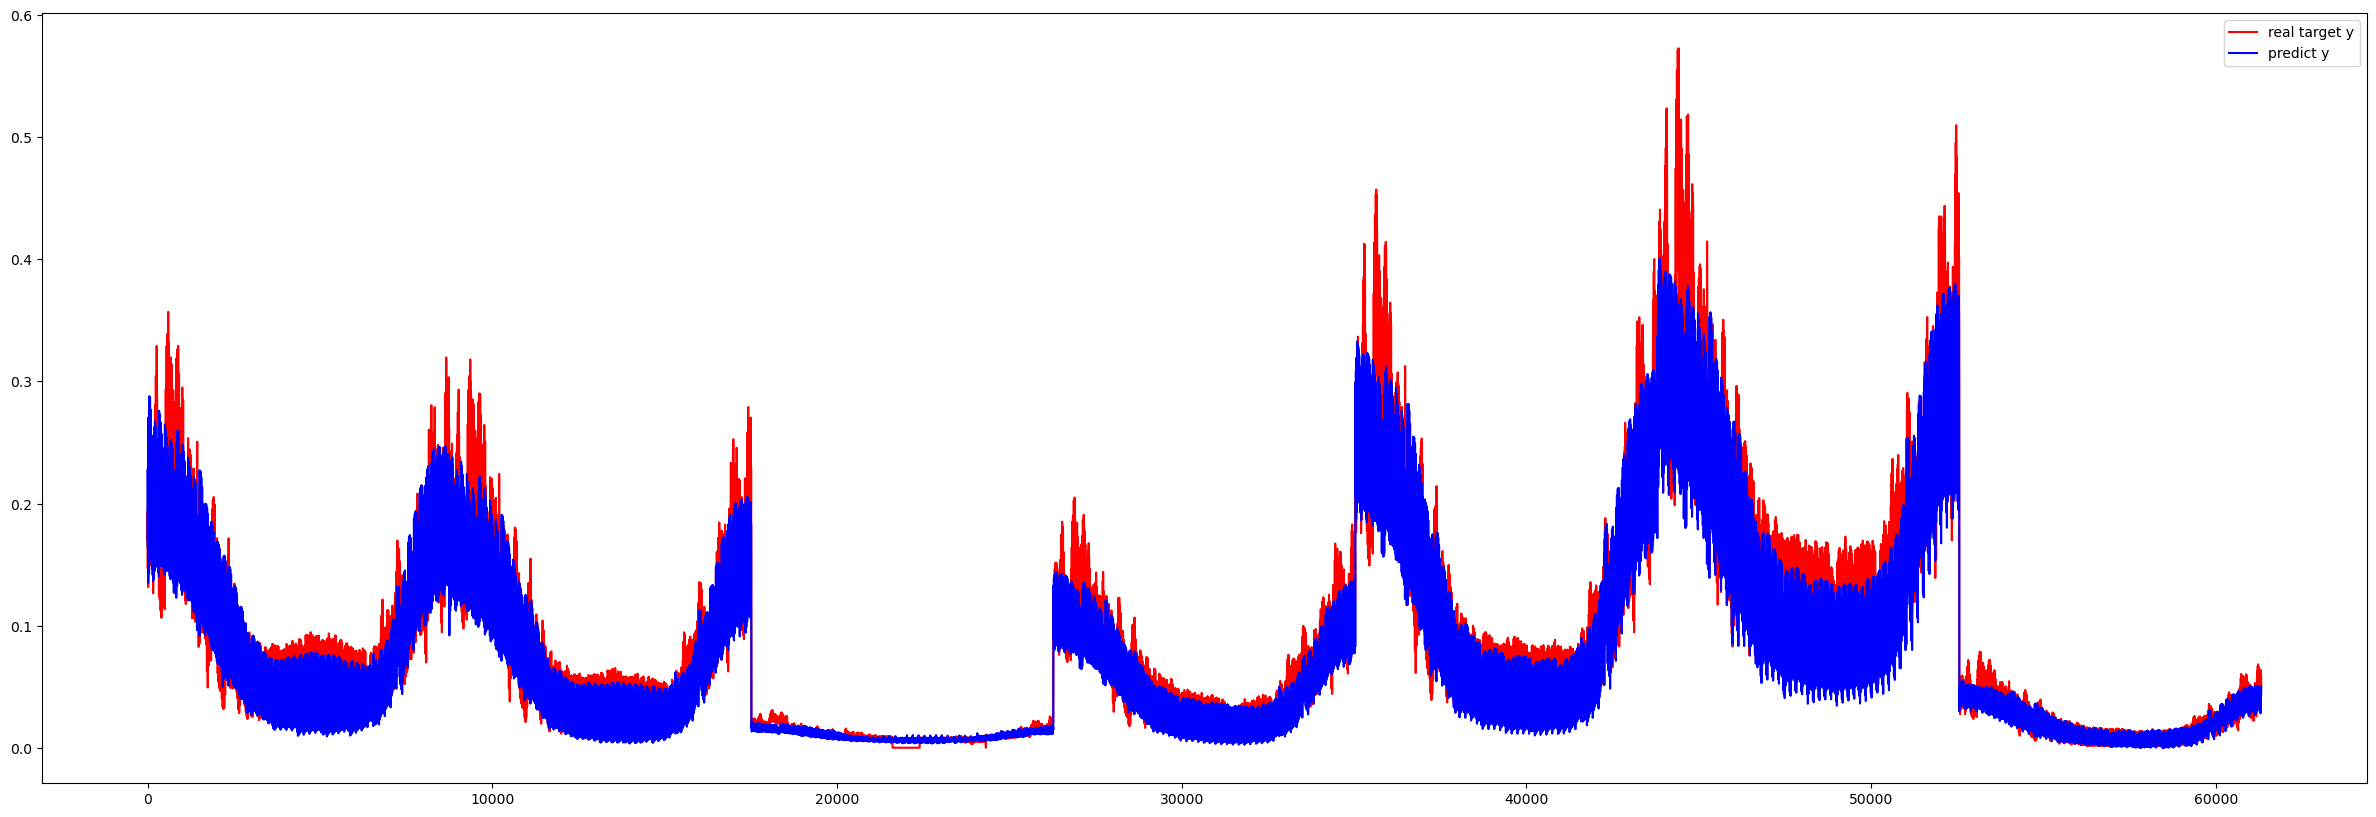

In [36]:
# 실제값, 예측값 비교

plt.figure(figsize=(30, 10))
plt.plot(test_y, color='red', label='real target y')
plt.plot(pred_y3, color='blue', label='predict y')
plt.legend()
plt.show()

### 다른 파라미터 변경

평가 지표값은 매우 좋게 나오지만 그래프상으로 최대값과 같은 큰값들을 예측하지 못하는 것 같아 이상치나 큰 값에 강한 모델을 위해 파라미터를 조절함

#### unit 40으로 변경 - layer3

unit 수를 늘려서 모델을 복잡도를 높여 훈련

unit 40,40,40 / activation = tanh / optimizer = adam / loss = mse / metrics = mae

test MSE 0.0005

test MAE 0.0127

--> 평가지표는 크게 차이가 없지만, 그래프 상 차이

In [51]:
early= EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model4 = Sequential()
model4.add(LSTM(units=40, activation='tanh', return_sequences=True, input_shape=(7,5)))
model4.add(LSTM(units=40, activation='tanh', return_sequences=True))
model4.add(LSTM(units=40, activation='tanh'))
model4.add(Dense(1))

model4.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

model4.fit(train_x, train_y, epochs=100, validation_split=0.2, callbacks=[early])


Epoch 1/100
7670/7670 [==============================] - 64s 8ms/step - loss: 0.0013 - mae: 0.0221 - val_loss: 4.5857e-04 - val_mae: 0.0121
Epoch 2/100
7670/7670 [==============================] - 69s 9ms/step - loss: 3.6995e-04 - mae: 0.0119 - val_loss: 5.1782e-04 - val_mae: 0.0130
Epoch 3/100
7670/7670 [==============================] - 74s 10ms/step - loss: 3.0997e-04 - mae: 0.0107 - val_loss: 4.3849e-04 - val_mae: 0.0120
Epoch 4/100
7670/7670 [==============================] - 80s 10ms/step - loss: 2.7940e-04 - mae: 0.0101 - val_loss: 3.8800e-04 - val_mae: 0.0114
Epoch 5/100
7670/7670 [==============================] - 70s 9ms/step - loss: 2.6279e-04 - mae: 0.0097 - val_loss: 4.1491e-04 - val_mae: 0.0117
Epoch 6/100
7670/7670 [==============================] - 77s 10ms/step - loss: 2.4935e-04 - mae: 0.0094 - val_loss: 5.6165e-04 - val_mae: 0.0130
Epoch 7/100
7670/7670 [==============================] - 77s 10ms/step - loss: 2.3893e-04 - mae: 0.0092 - val_loss: 3.3989e-04 - val_mae:

In [52]:
pred_y4 = model4.predict(test_x)


1917/1917 [==============================] - 6s 3ms/step


In [53]:
print("test MSE", round(mean_squared_error(test_y, pred_y4), 4))
print("test MAE", round(mean_absolute_error(test_y, pred_y4), 4))

test MSE 0.0005
test MAE 0.0127


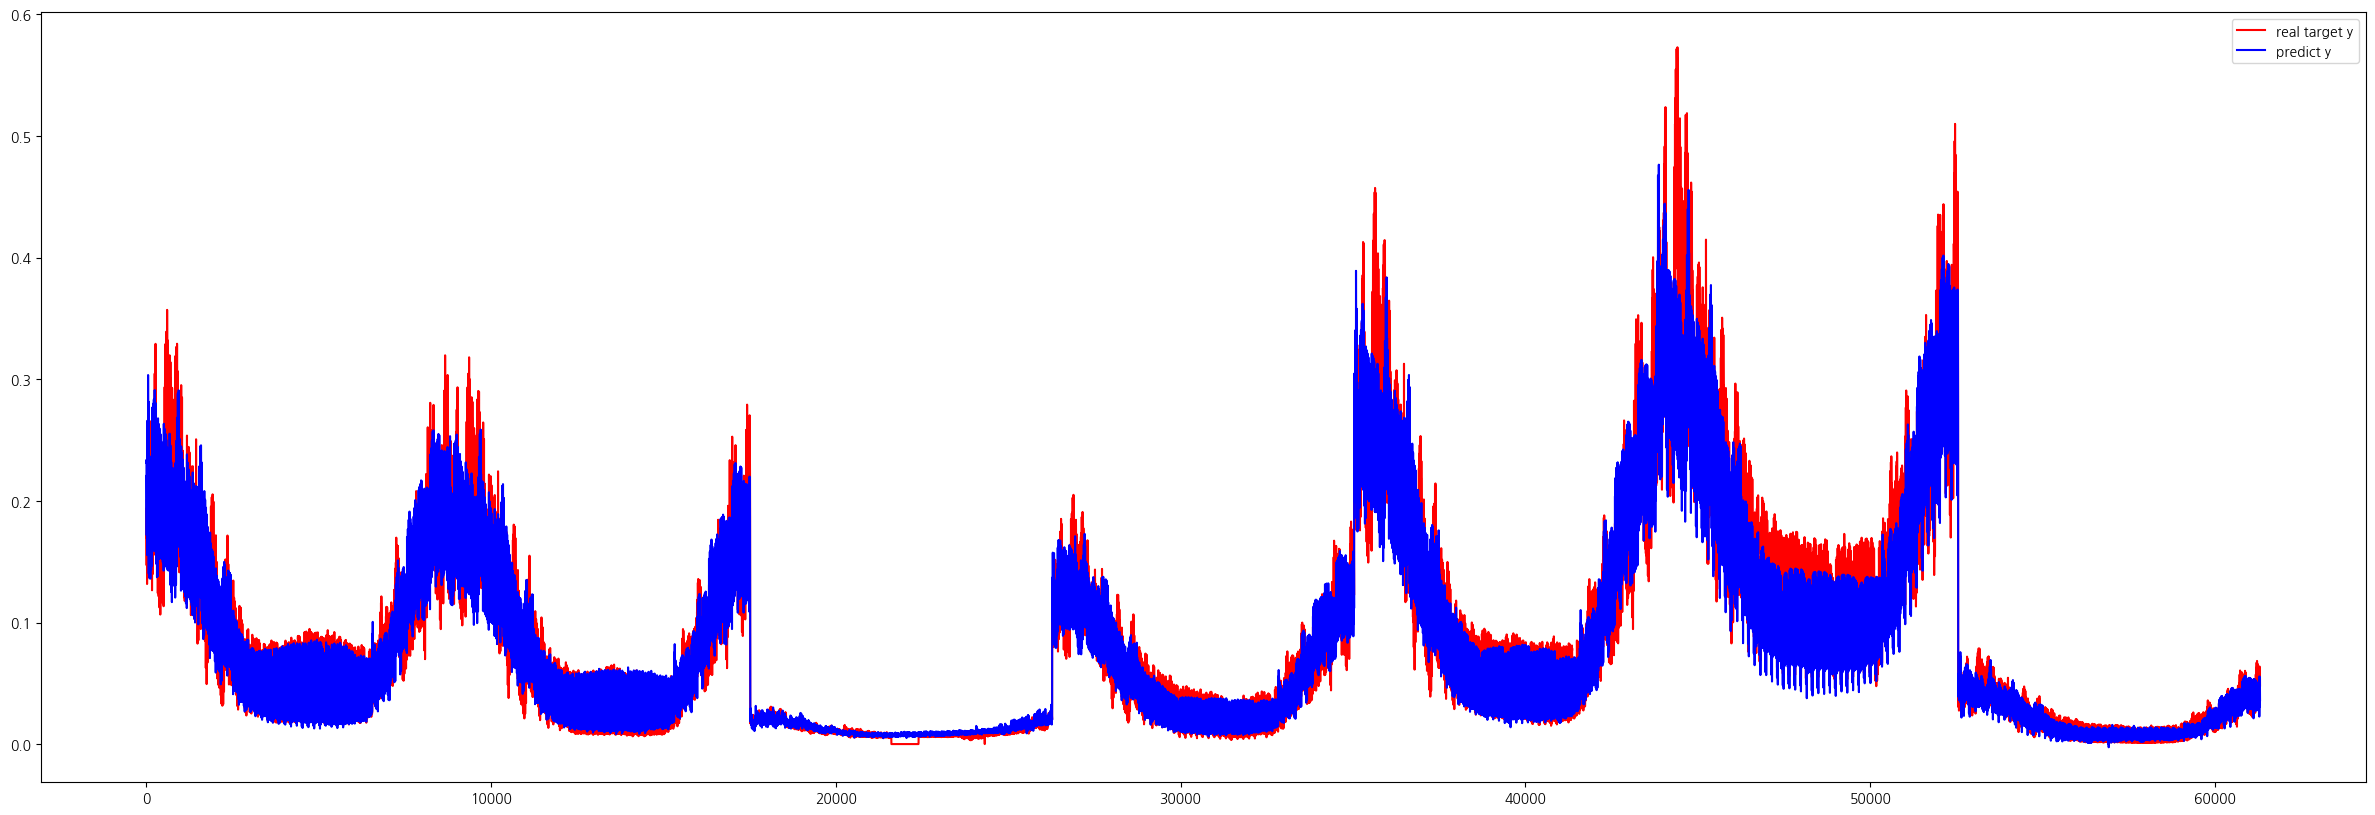

In [54]:
# 실제값, 예측값 비교

plt.figure(figsize=(30, 10))
plt.plot(test_y, color='red', label='real target y')
plt.plot(pred_y4, color='blue', label='predict y')
plt.legend()
plt.show()


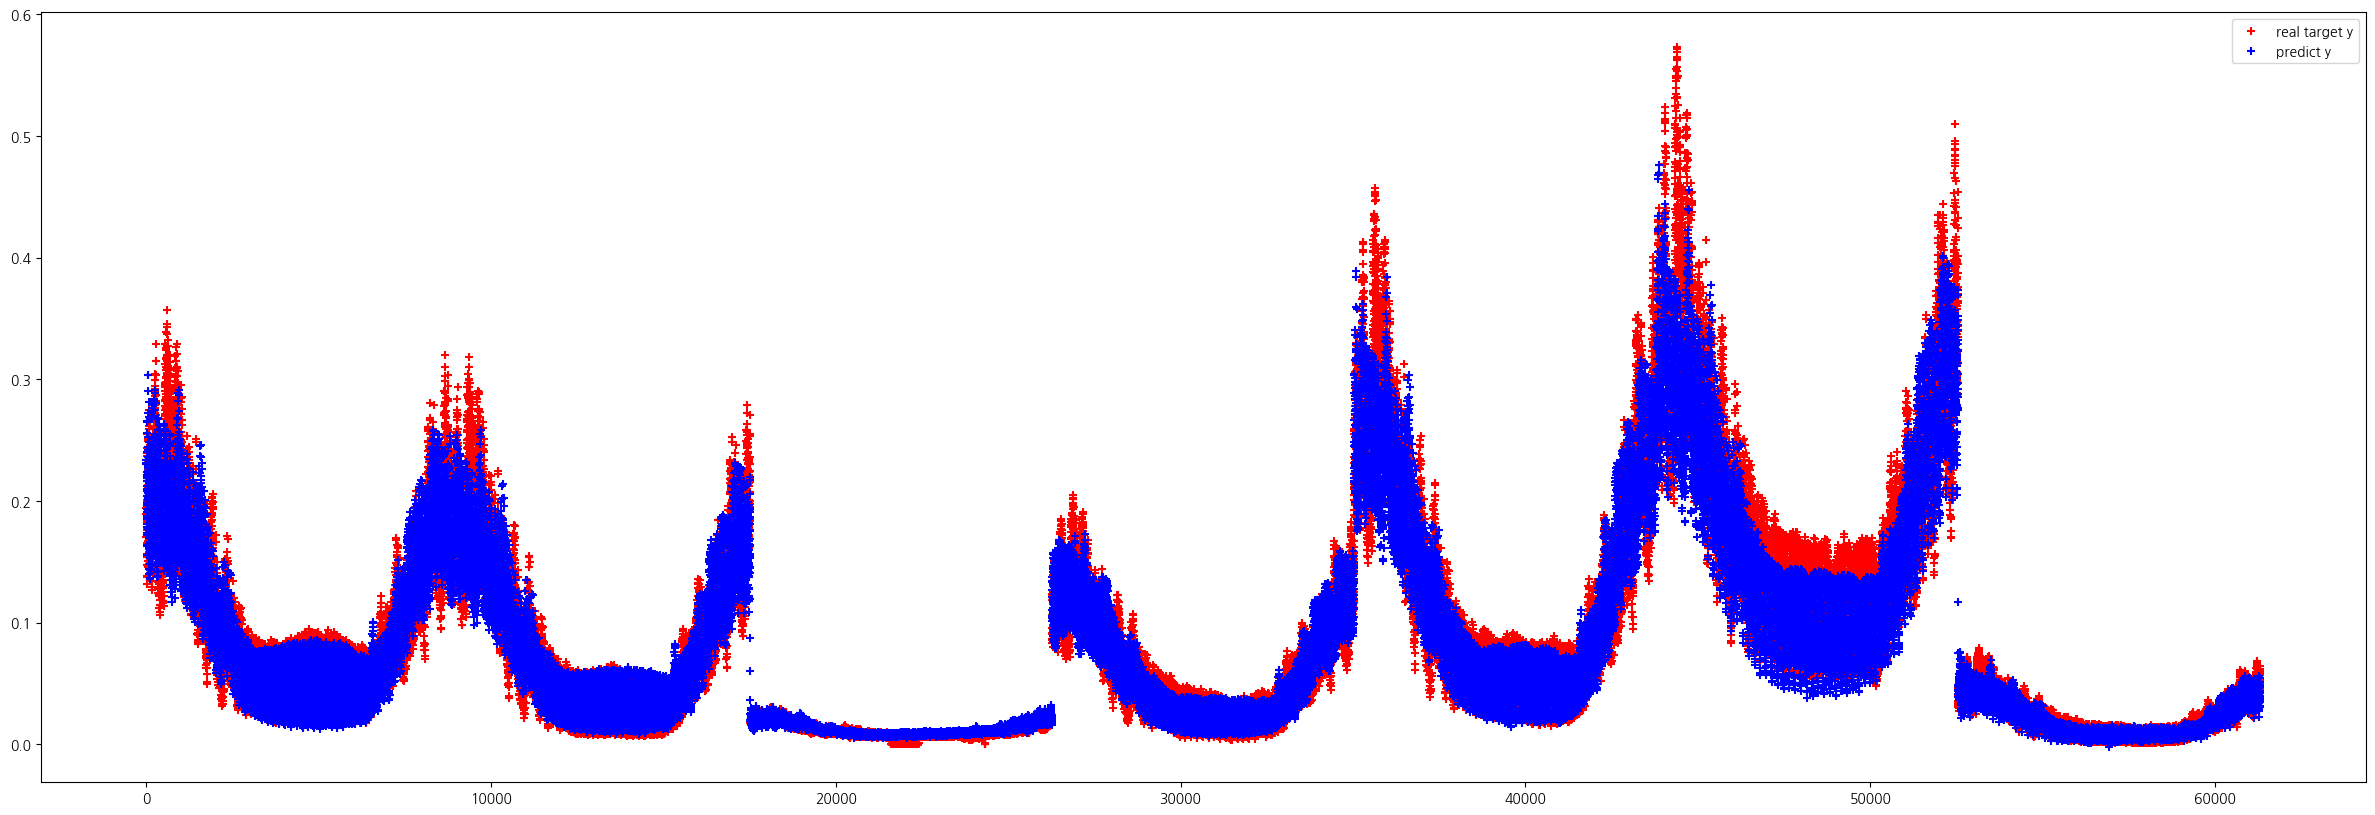

In [62]:
# 점 그래프로 변경

plt.figure(figsize=(30, 10))
plt.scatter(range(len(test_y)), test_y, color='red', label='real target y', marker='+')
plt.scatter(range(len(pred_y4)), pred_y4, color='blue', label='predict y', marker='+')
plt.legend()
plt.show()


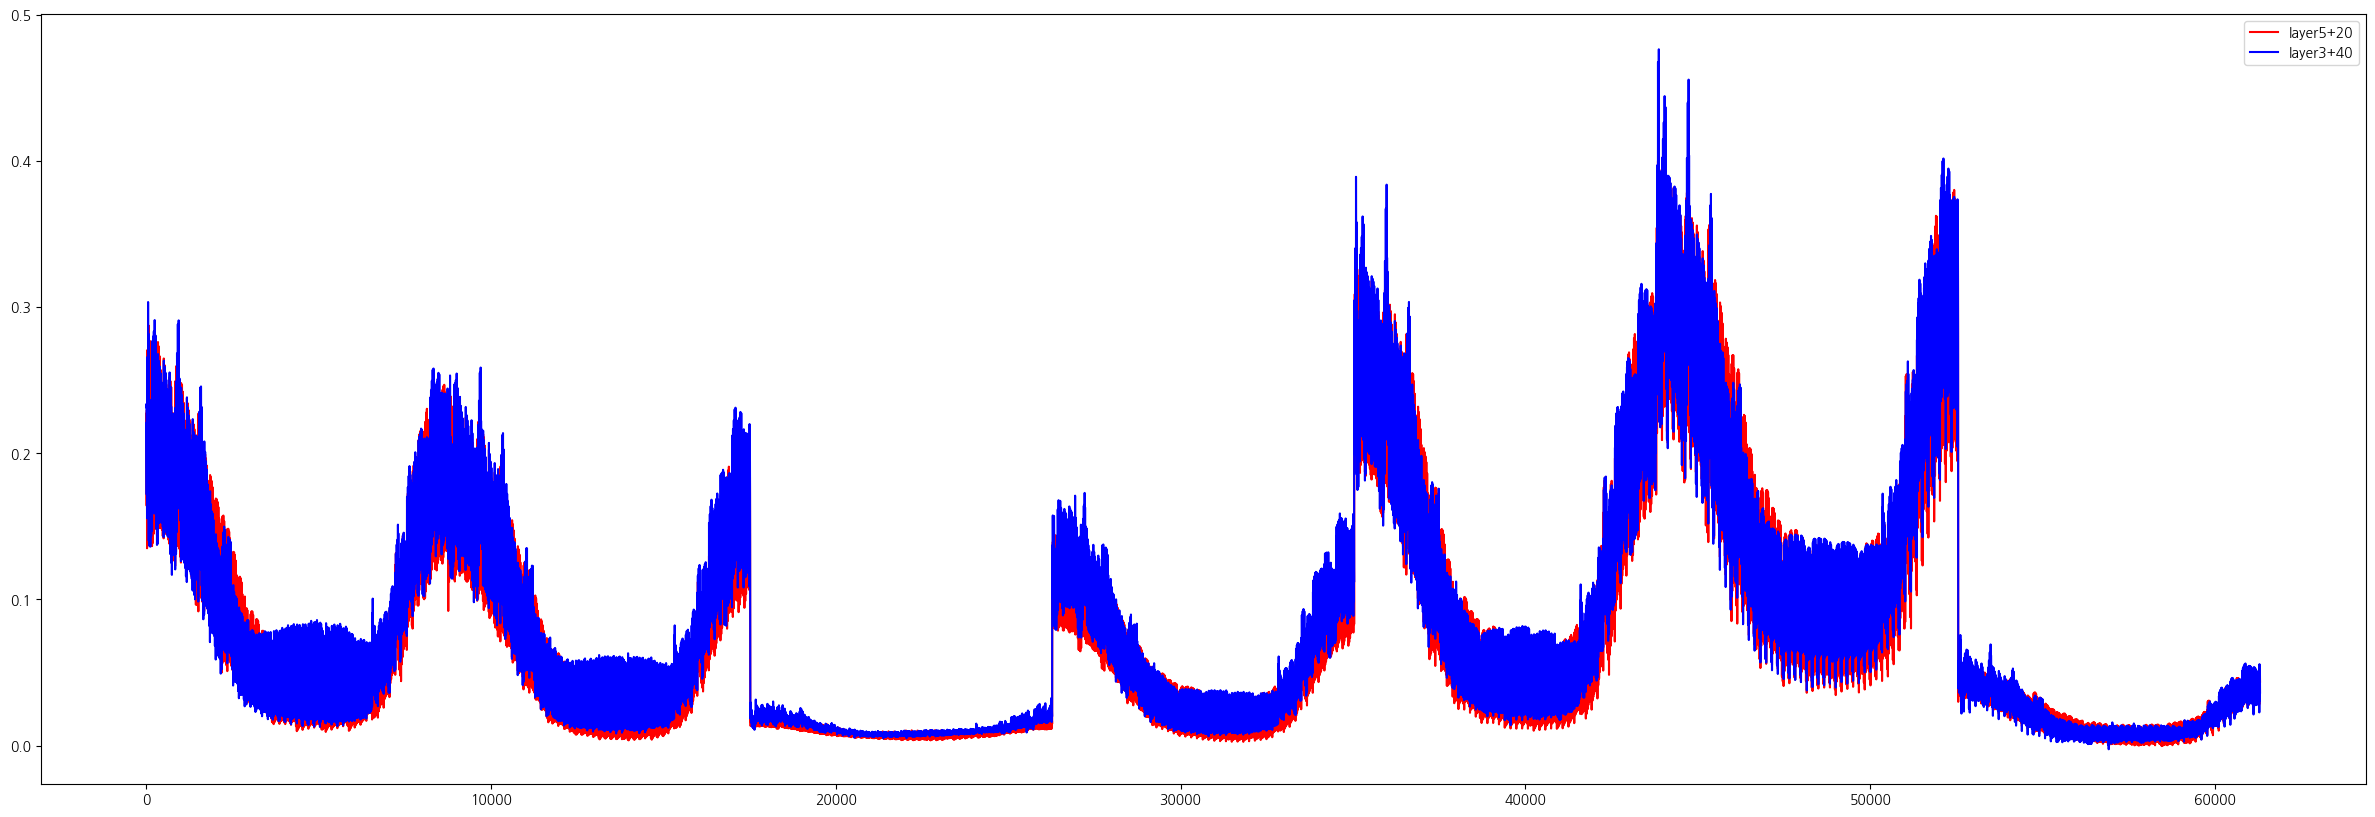

In [59]:
# 예측3, 예측4 비교
# 예측4(unit 값을 올린 모델)가 예측 3모델보다 값을 더 크게 예측하고 있음

plt.figure(figsize=(30, 10))
plt.plot(pred_y3, color='red', label='layer5+20')
plt.plot(pred_y4, color='blue', label='layer3+40')
plt.legend()
plt.show()


#### unit 40 layer 5

In [141]:
early= EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model4 = Sequential()
model4.add(LSTM(units=40, activation='tanh', return_sequences=True, input_shape=(7,5)))
model4.add(LSTM(units=40, activation='tanh', return_sequences=True))
model4.add(LSTM(units=40, activation='tanh'))
model4.add(Dense(1))

model4.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

model4.fit(train_x, train_y, epochs=100, validation_split=0.2, callbacks=[early])


Epoch 1/100
7670/7670 [==============================] - 70s 8ms/step - loss: 9.7769e-04 - mae: 0.0190 - val_loss: 6.3793e-04 - val_mae: 0.0142
Epoch 2/100
7670/7670 [==============================] - 91s 12ms/step - loss: 3.5432e-04 - mae: 0.0117 - val_loss: 4.5404e-04 - val_mae: 0.0124
Epoch 3/100
7670/7670 [==============================] - 84s 11ms/step - loss: 3.1850e-04 - mae: 0.0109 - val_loss: 4.0853e-04 - val_mae: 0.0109
Epoch 4/100
7670/7670 [==============================] - 86s 11ms/step - loss: 2.9855e-04 - mae: 0.0104 - val_loss: 4.4446e-04 - val_mae: 0.0111
Epoch 5/100
7670/7670 [==============================] - 85s 11ms/step - loss: 2.6861e-04 - mae: 0.0099 - val_loss: 4.4712e-04 - val_mae: 0.0113
Epoch 6/100
7670/7670 [==============================] - 85s 11ms/step - loss: 2.5623e-04 - mae: 0.0097 - val_loss: 4.3563e-04 - val_mae: 0.0112
Epoch 7/100
7670/7670 [==============================] - 87s 11ms/step - loss: 2.4250e-04 - mae: 0.0093 - val_loss: 6.3444e-04 - va

In [143]:
pred_y4 = model4.predict(test_x)


1917/1917 [==============================] - 6s 3ms/step


In [144]:
print("test MSE", round(mean_squared_error(test_y, pred_y4), 4))
print("test MAE", round(mean_absolute_error(test_y, pred_y4), 4))

test MSE 0.0005
test MAE 0.0133


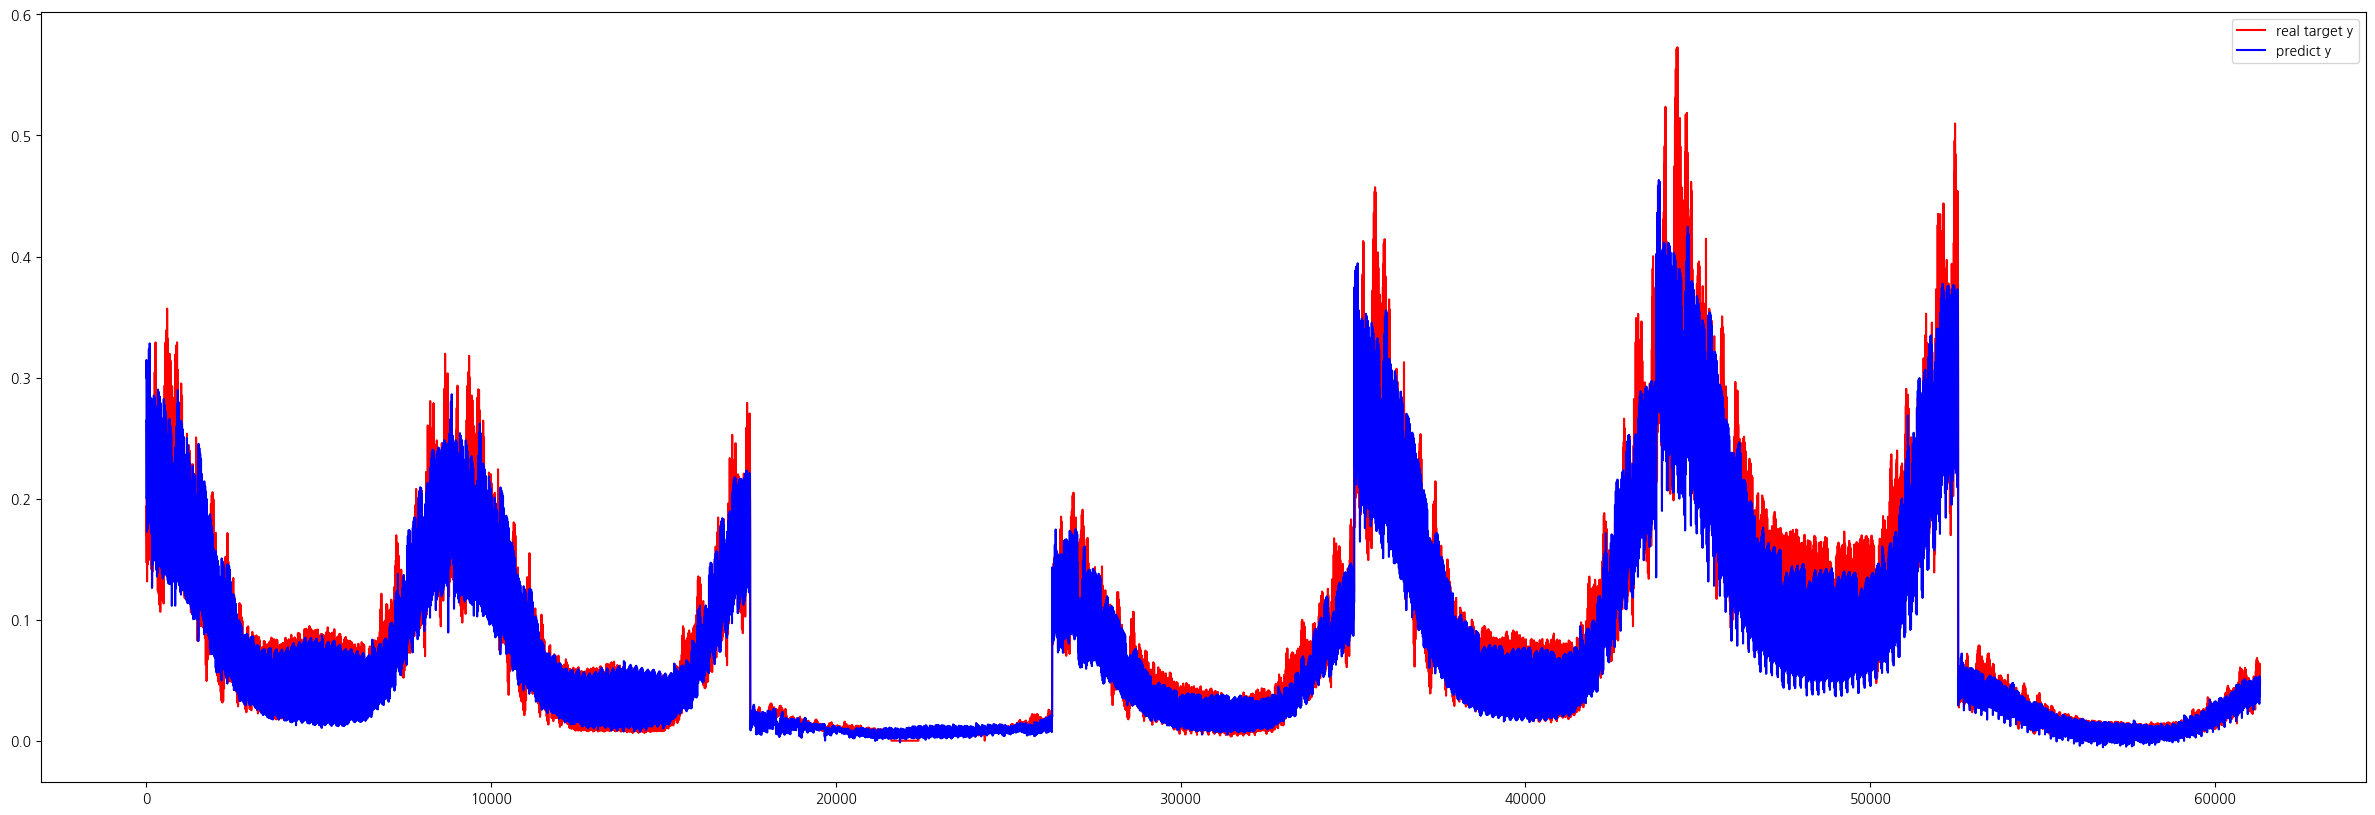

In [145]:
# 실제값, 예측값 비교

plt.figure(figsize=(30, 10))
plt.plot(test_y, color='red', label='real target y')
plt.plot(pred_y4, color='blue', label='predict y')
plt.legend()
plt.show()


#### 학습률 변경

lstm3-40에서 학습률 기본값 0.001 -> 0.0001로 변경하여 모델이 더 촘촘히 학습, 이상치나 큰 값에 영향받을 수 있도록

unit 40,40,40 / activation = tanh / optimizer = custom_adam_optimizer / loss = mse / metrics = mae

test MSE 0.0006

test MAE 0.0132

--> 지표+그래프 모두 본 결과 기존 학습률이 더 낫다고 판단

In [63]:
from keras.optimizers import Adam

# 기본 학습률을 변경하여 Adam 옵티마이저 생성
custom_adam_optimizer = Adam(learning_rate=0.0001)

In [64]:
early= EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model4 = Sequential()
model4.add(LSTM(units=40, activation='tanh', return_sequences=True, input_shape=(7,5)))
model4.add(LSTM(units=40, activation='tanh', return_sequences=True))
model4.add(LSTM(units=40, activation='tanh'))
model4.add(Dense(1))

model4.compile(optimizer=custom_adam_optimizer, loss='mean_squared_error', metrics=['mae'])

model4.fit(train_x, train_y, epochs=100, validation_split=0.2, callbacks=[early])


Epoch 1/100
7670/7670 [==============================] - 69s 8ms/step - loss: 0.0039 - mae: 0.0465 - val_loss: 0.0032 - val_mae: 0.0391
Epoch 2/100
7670/7670 [==============================] - 90s 12ms/step - loss: 0.0011 - mae: 0.0230 - val_loss: 7.3549e-04 - val_mae: 0.0182
Epoch 3/100
7670/7670 [==============================] - 72s 9ms/step - loss: 4.9520e-04 - mae: 0.0153 - val_loss: 5.2534e-04 - val_mae: 0.0161
Epoch 4/100
7670/7670 [==============================] - 86s 11ms/step - loss: 4.1481e-04 - mae: 0.0136 - val_loss: 4.4236e-04 - val_mae: 0.0144
Epoch 5/100
7670/7670 [==============================] - 82s 11ms/step - loss: 3.7145e-04 - mae: 0.0127 - val_loss: 4.3560e-04 - val_mae: 0.0128
Epoch 6/100
7670/7670 [==============================] - 83s 11ms/step - loss: 3.4451e-04 - mae: 0.0120 - val_loss: 4.7211e-04 - val_mae: 0.0139
Epoch 7/100
7670/7670 [==============================] - 78s 10ms/step - loss: 3.2596e-04 - mae: 0.0115 - val_loss: 5.5183e-04 - val_mae: 0.0143

In [65]:
pred_y44 = model4.predict(test_x)

1917/1917 [==============================] - 6s 3ms/step


In [91]:
print("test MSE", round(mean_squared_error(test_y, pred_y44), 4))
print("test MAE", round(mean_absolute_error(test_y, pred_y44), 4))

test MSE 0.0006
test MAE 0.0132


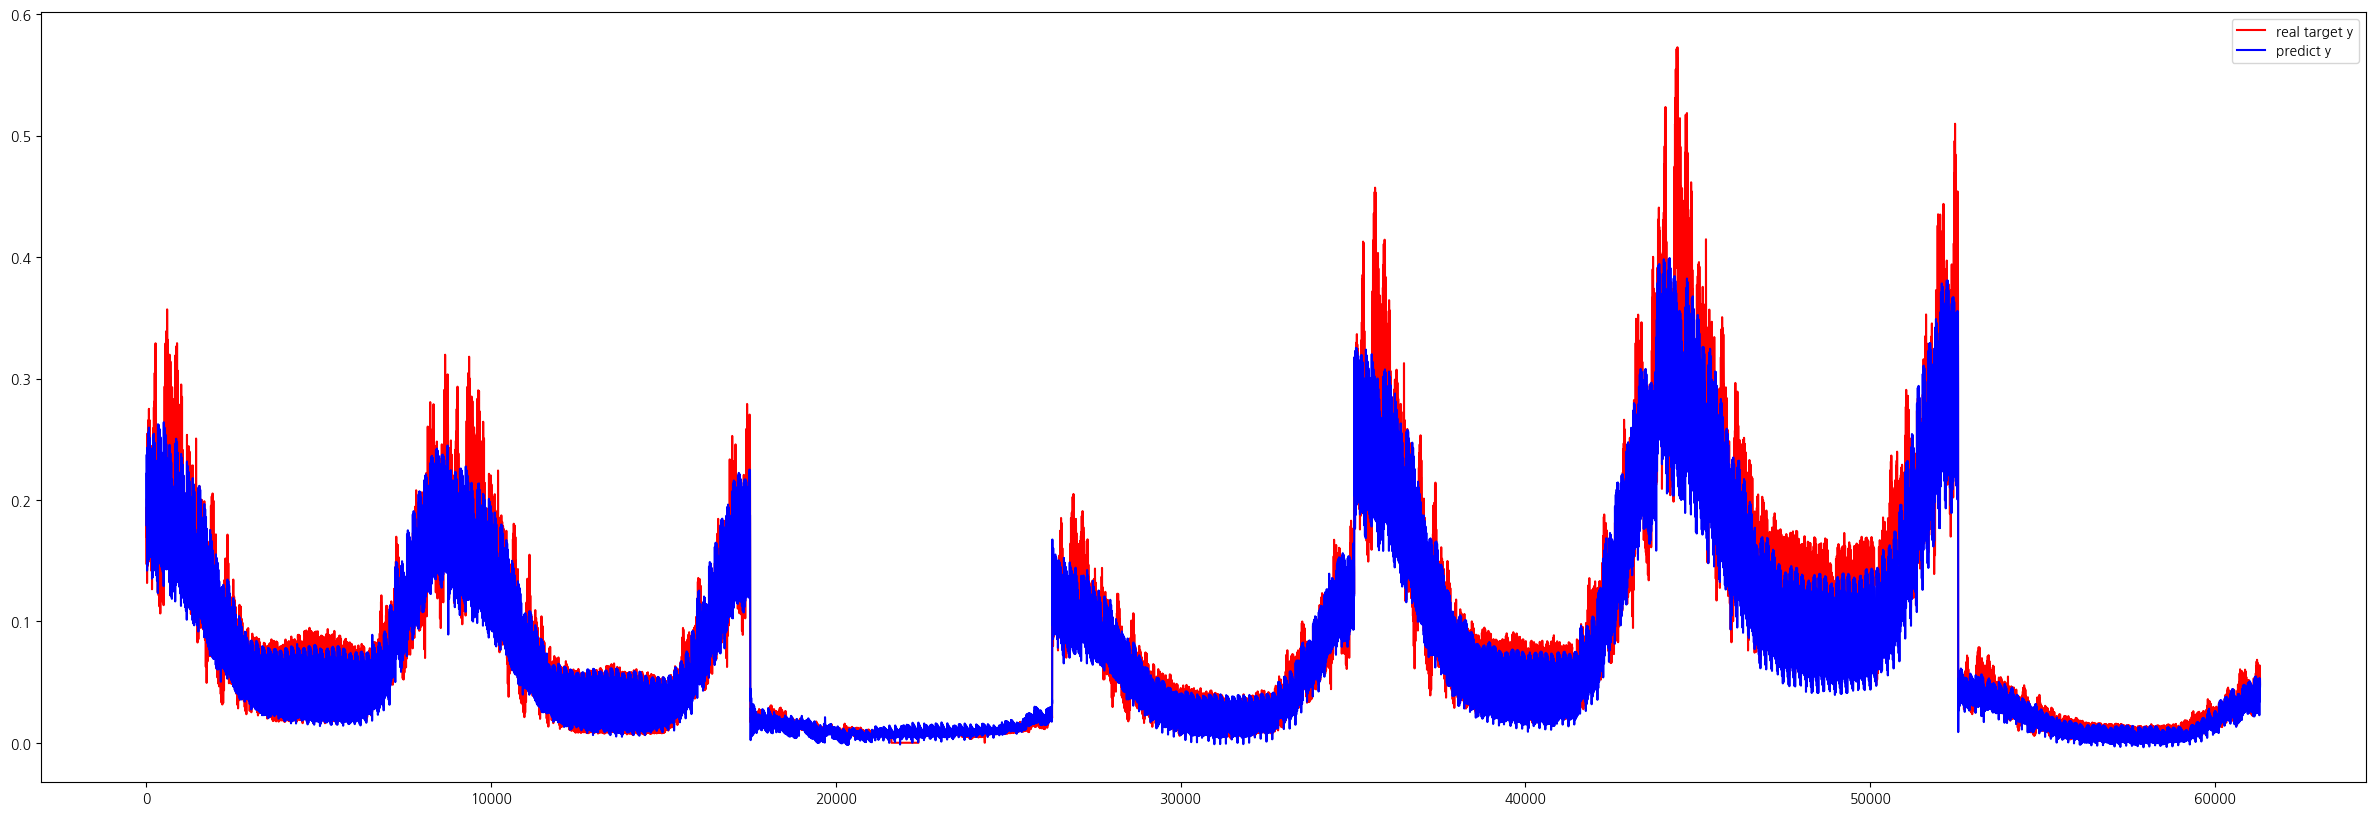

In [142]:
# 실제값, 예측값 비교

plt.figure(figsize=(30, 10))
plt.plot(test_y, color='red', label='real target y')
plt.plot(pred_y44, color='blue', label='predict y')
plt.legend()
plt.show()


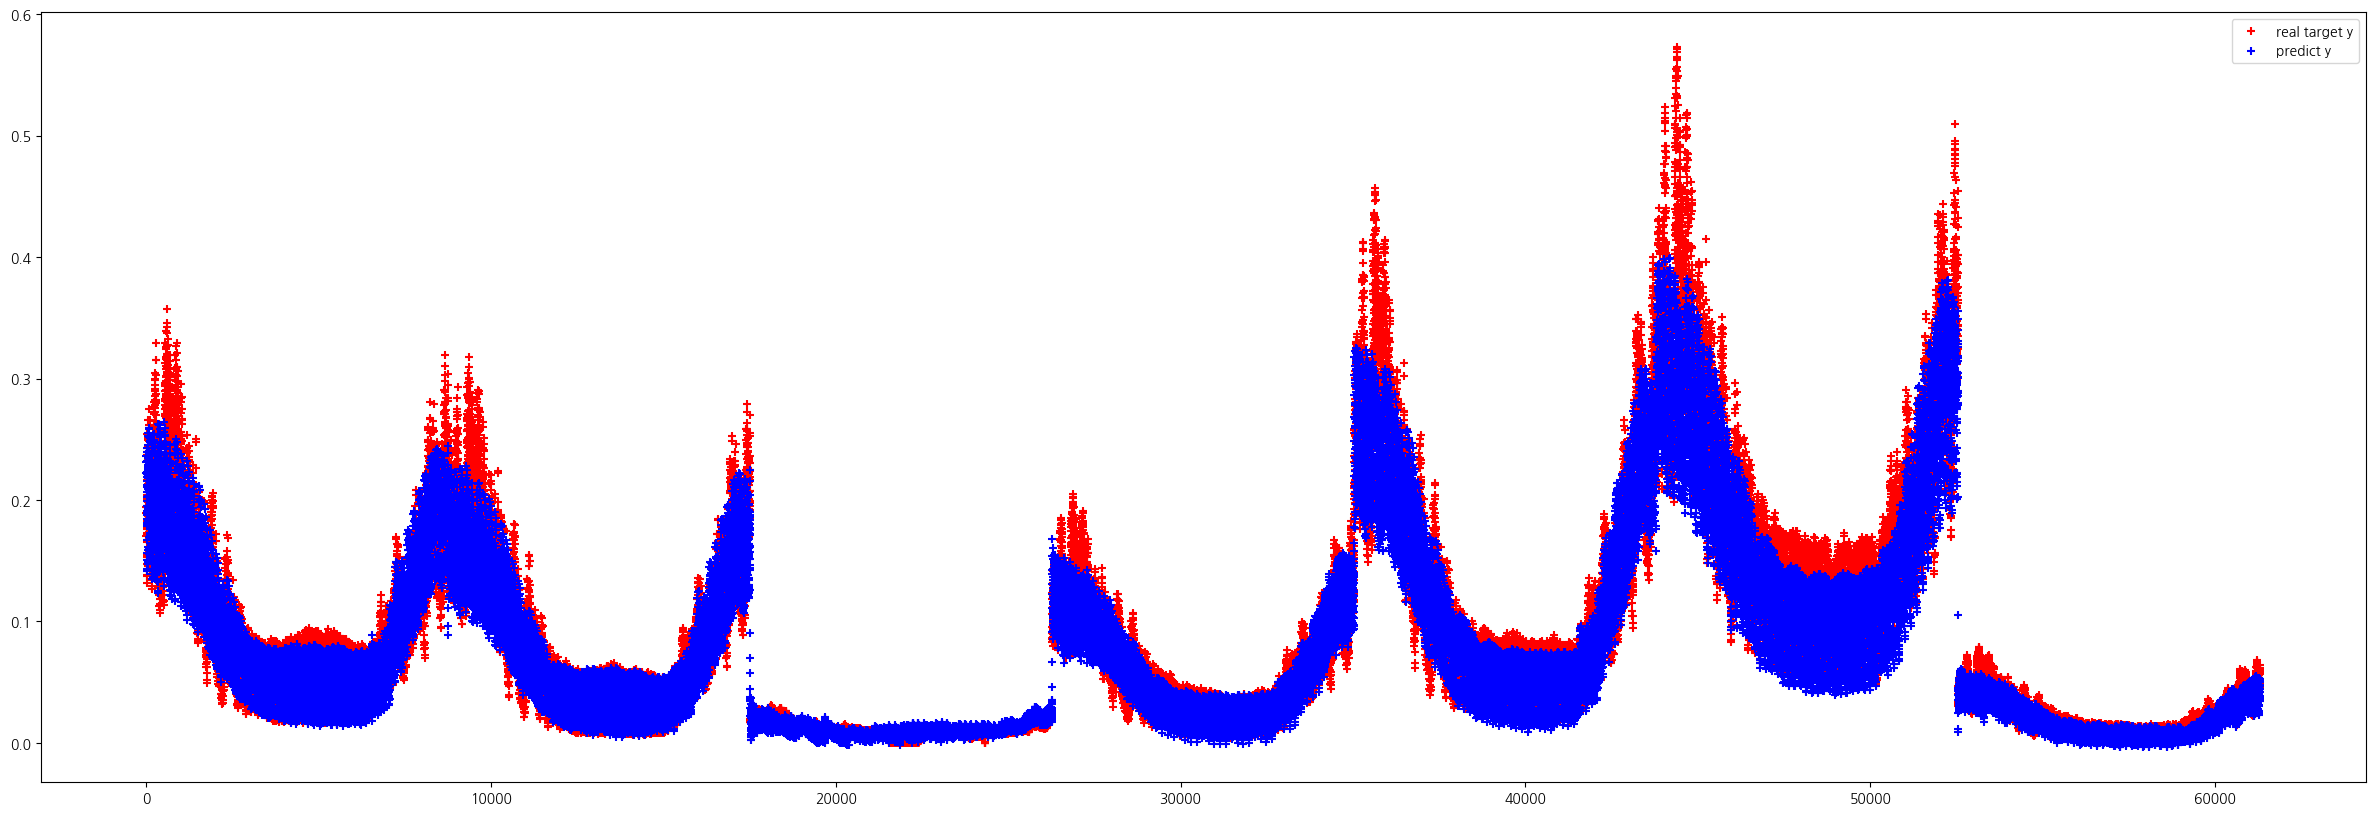

In [67]:
# 실제값, 예측값 비교

plt.figure(figsize=(30, 10))
plt.scatter(range(len(test_y)), test_y, color='red', label='real target y', marker='+')
plt.scatter(range(len(pred_y44)), pred_y44, color='blue', label='predict y', marker='+')
plt.legend()
plt.show()


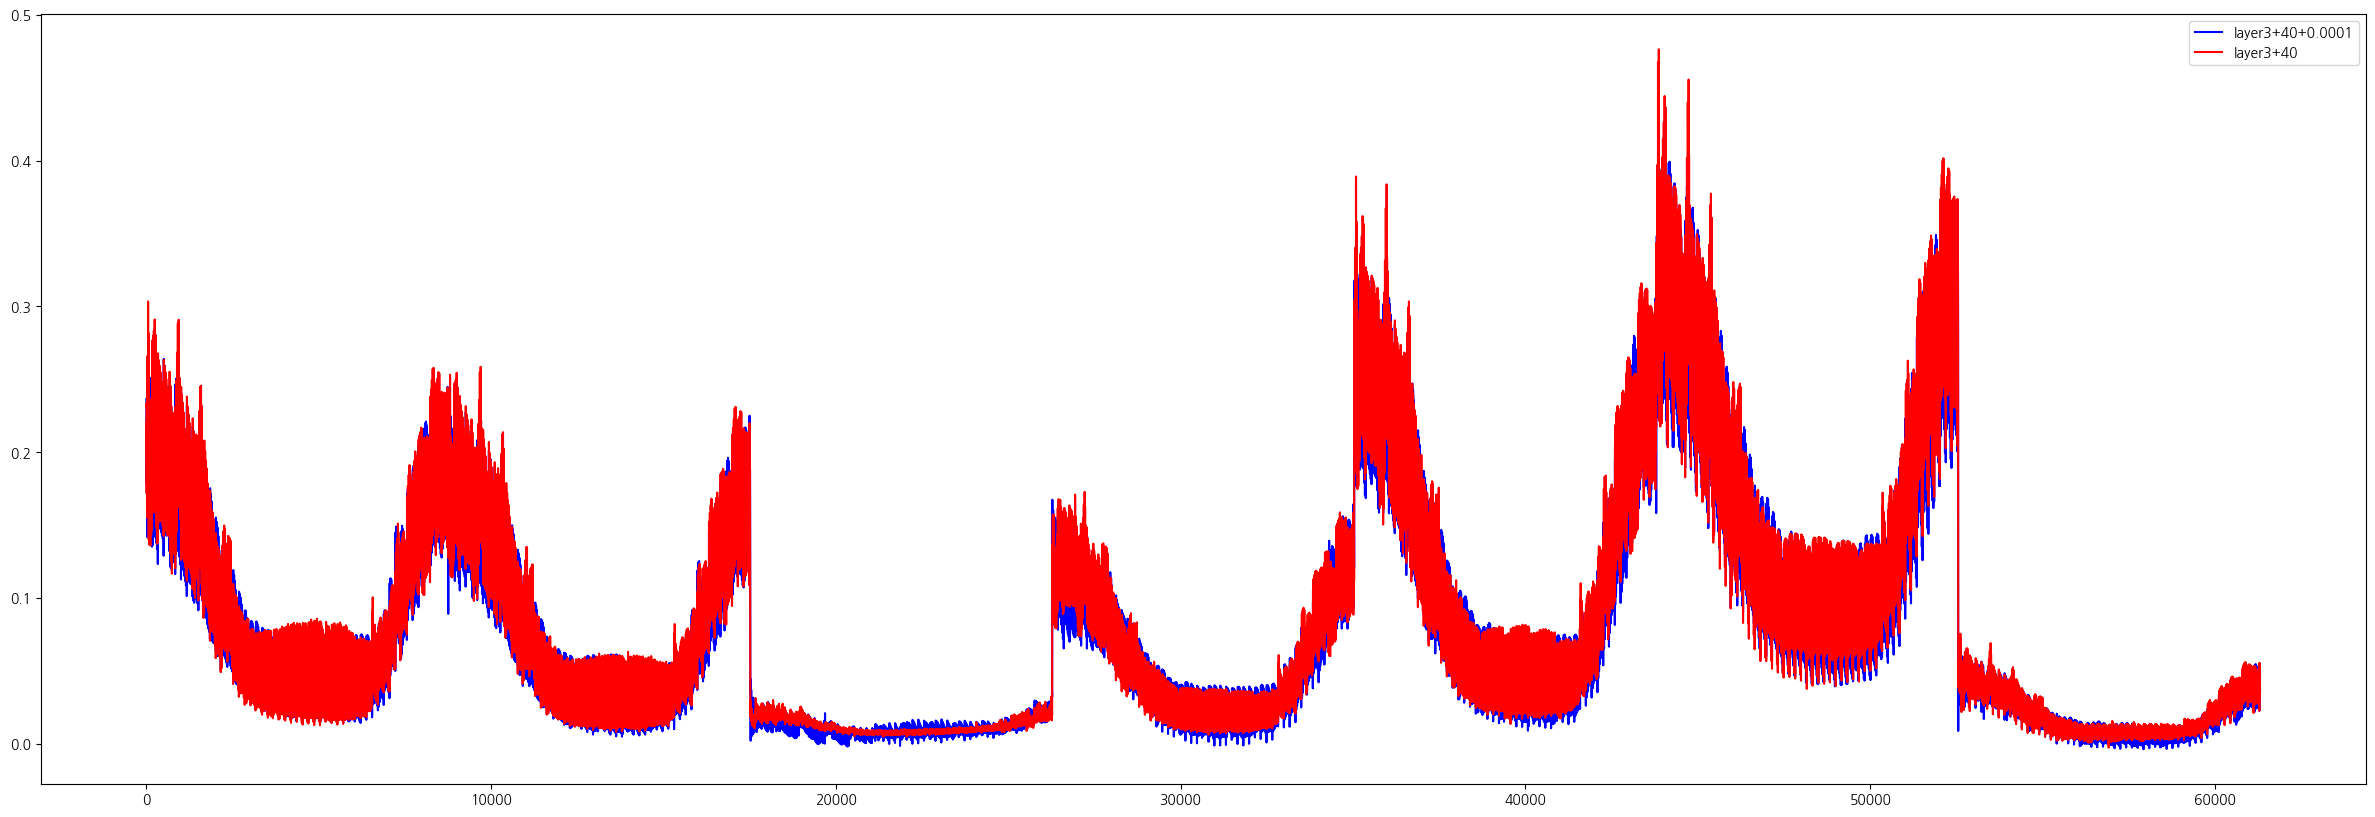

In [69]:
# 예측4, 예측44 비교

plt.figure(figsize=(30, 10))
plt.plot(pred_y44, color='blue', label='layer3+40+0.0001')
plt.plot(pred_y4, color='red', label='layer3+40')

plt.legend()
plt.show()


### 전처리 다시 - 모델 재학습

#### 시퀀스 30

시퀀스 데이터를 7일 -> 30일로 전처리 후 가장 성능이 좋았던 (lstm layer 3 + unit40)모델로 돌려보기

test MSE 0.0006

test MAE 0.0132

In [97]:
# LSTM 모델에 맞도록 input 데이터 전처리
# 한달(30일)의 데이터로 다음날의 공급량을 예측할 수 있게 전처리

window_size = 30
data_x, data_y = [], []

for i in range(len(y) - window_size):
    _x = x[i:i+window_size]
    _y = y[i+window_size]
    data_x.append(_x)
    data_y.append(_y)


In [129]:
train_size = 306768
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

In [130]:
MIN = train_y.min()
MAX = train_y.max()

def MinMaxScale(array, min, max):

    return (array - min) / (max - min)


train_y = MinMaxScale(train_y, MIN, MAX)
test_y = MinMaxScale(test_y, MIN, MAX)


In [131]:
pd.Series(train_y.ravel()).describe()


count    306768.000000
mean          0.080526
std           0.078436
min           0.000000
25%           0.018771
50%           0.054153
75%           0.119201
max           1.000000
dtype: float64

In [132]:

pd.Series(test_y.ravel()).describe()

count    61313.000000
mean         0.087374
std          0.087099
min          0.000119
25%          0.020295
50%          0.058529
75%          0.127713
max          0.572820
dtype: float64

In [119]:

print('훈련 데이터의 크기 :', train_x.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_x.shape, test_y.shape)

훈련 데이터의 크기 : (306768, 3, 5) (306768, 1)
테스트 데이터의 크기 : (61317, 3, 5) (61317, 1)


In [104]:
### 모델

early= EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model4 = Sequential()
model4.add(LSTM(units=40, activation='tanh', return_sequences=True, input_shape=(30,5)))
model4.add(LSTM(units=40, activation='tanh', return_sequences=True))
model4.add(LSTM(units=40, activation='tanh'))
model4.add(Dense(1))

model4.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

model4.fit(train_x, train_y, epochs=100, validation_split=0.2, callbacks=[early])

pred_y4 = model4.predict(test_x)


Epoch 1/100
7670/7670 [==============================] - 231s 29ms/step - loss: 9.7061e-04 - mae: 0.0187 - val_loss: 4.4850e-04 - val_mae: 0.0124
Epoch 2/100
7670/7670 [==============================] - 252s 33ms/step - loss: 3.7268e-04 - mae: 0.0119 - val_loss: 4.9312e-04 - val_mae: 0.0136
Epoch 3/100
7670/7670 [==============================] - 244s 32ms/step - loss: 3.1949e-04 - mae: 0.0108 - val_loss: 4.3089e-04 - val_mae: 0.0114
Epoch 4/100
7670/7670 [==============================] - 236s 31ms/step - loss: 2.8548e-04 - mae: 0.0102 - val_loss: 3.8421e-04 - val_mae: 0.0111
Epoch 5/100
7670/7670 [==============================] - 234s 31ms/step - loss: 2.6320e-04 - mae: 0.0097 - val_loss: 4.0317e-04 - val_mae: 0.0114
Epoch 6/100
7670/7670 [==============================] - 227s 30ms/step - loss: 2.6387e-04 - mae: 0.0095 - val_loss: 4.4801e-04 - val_mae: 0.0120
Epoch 7/100
7670/7670 [==============================] - 221s 29ms/step - loss: 2.5585e-04 - mae: 0.0093 - val_loss: 3.5929e

In [105]:
print("test MSE", round(mean_squared_error(test_y, pred_y4), 4))
print("test MAE", round(mean_absolute_error(test_y, pred_y4), 4))

test MSE 0.0006
test MAE 0.0132


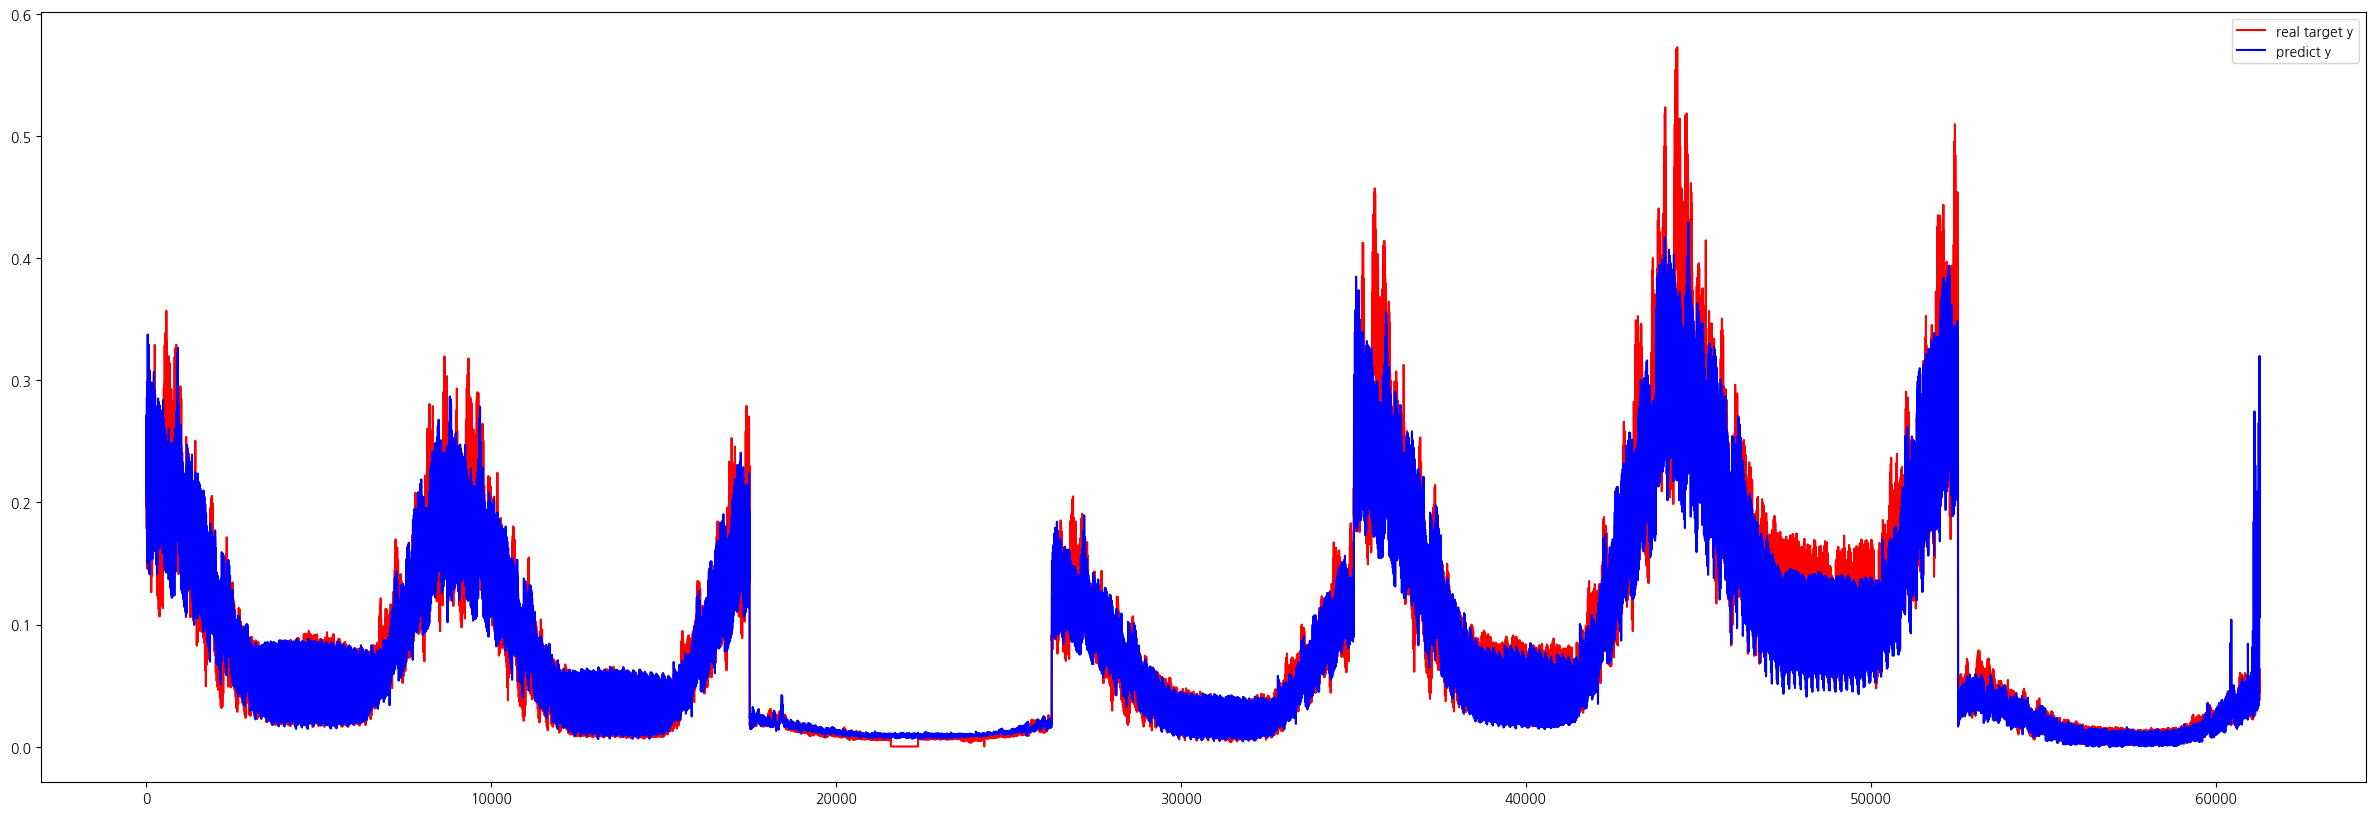

In [106]:
# 실제값, 예측값 비교

plt.figure(figsize=(30, 10))
plt.plot(test_y, color='red', label='real target y')
plt.plot(pred_y4, color='blue', label='predict y')
plt.legend()
plt.show()

#### 시퀀스 3

시퀀스 데이터를 3일로 전처리 후 가장 성능이 좋았던 (lstm layer 3 + unit40)모델로 돌려보기

test MSE 0.0005

test MAE 0.0128

In [114]:
# LSTM 모델에 맞도록 input 데이터 전처리
# 3일의 데이터로 다음날의 공급량을 예측할 수 있게 전처리

window_size = 3
data_x, data_y = [], []

for i in range(len(y) - window_size):
    _x = x[i:i+window_size]
    _y = y[i+window_size]
    data_x.append(_x)
    data_y.append(_y)


In [120]:
# 나머지는 위에서 해결

### 모델

early= EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model4 = Sequential()
model4.add(LSTM(units=40, activation='tanh', return_sequences=True, input_shape=(3,5)))
model4.add(LSTM(units=40, activation='tanh', return_sequences=True))
model4.add(LSTM(units=40, activation='tanh'))
model4.add(Dense(1))

model4.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

model4.fit(train_x, train_y, epochs=100, validation_split=0.2, callbacks=[early])

pred_y4 = model4.predict(test_x)


Epoch 1/100
7670/7670 [==============================] - 49s 6ms/step - loss: 0.0011 - mae: 0.0208 - val_loss: 5.7023e-04 - val_mae: 0.0149
Epoch 2/100
7670/7670 [==============================] - 49s 6ms/step - loss: 3.8713e-04 - mae: 0.0122 - val_loss: 5.3735e-04 - val_mae: 0.0126
Epoch 3/100
7670/7670 [==============================] - 60s 8ms/step - loss: 3.3182e-04 - mae: 0.0111 - val_loss: 4.8327e-04 - val_mae: 0.0130
Epoch 4/100
7670/7670 [==============================] - 48s 6ms/step - loss: 3.1169e-04 - mae: 0.0107 - val_loss: 4.6514e-04 - val_mae: 0.0124
Epoch 5/100
7670/7670 [==============================] - 52s 7ms/step - loss: 2.9714e-04 - mae: 0.0103 - val_loss: 3.5569e-04 - val_mae: 0.0107
Epoch 6/100
7670/7670 [==============================] - 52s 7ms/step - loss: 2.9051e-04 - mae: 0.0102 - val_loss: 4.5107e-04 - val_mae: 0.0119
Epoch 7/100
7670/7670 [==============================] - 54s 7ms/step - loss: 2.7251e-04 - mae: 0.0098 - val_loss: 3.8658e-04 - val_mae: 0.0

In [121]:
print("test MSE", round(mean_squared_error(test_y, pred_y4), 4))
print("test MAE", round(mean_absolute_error(test_y, pred_y4), 4))

test MSE 0.0005
test MAE 0.0128


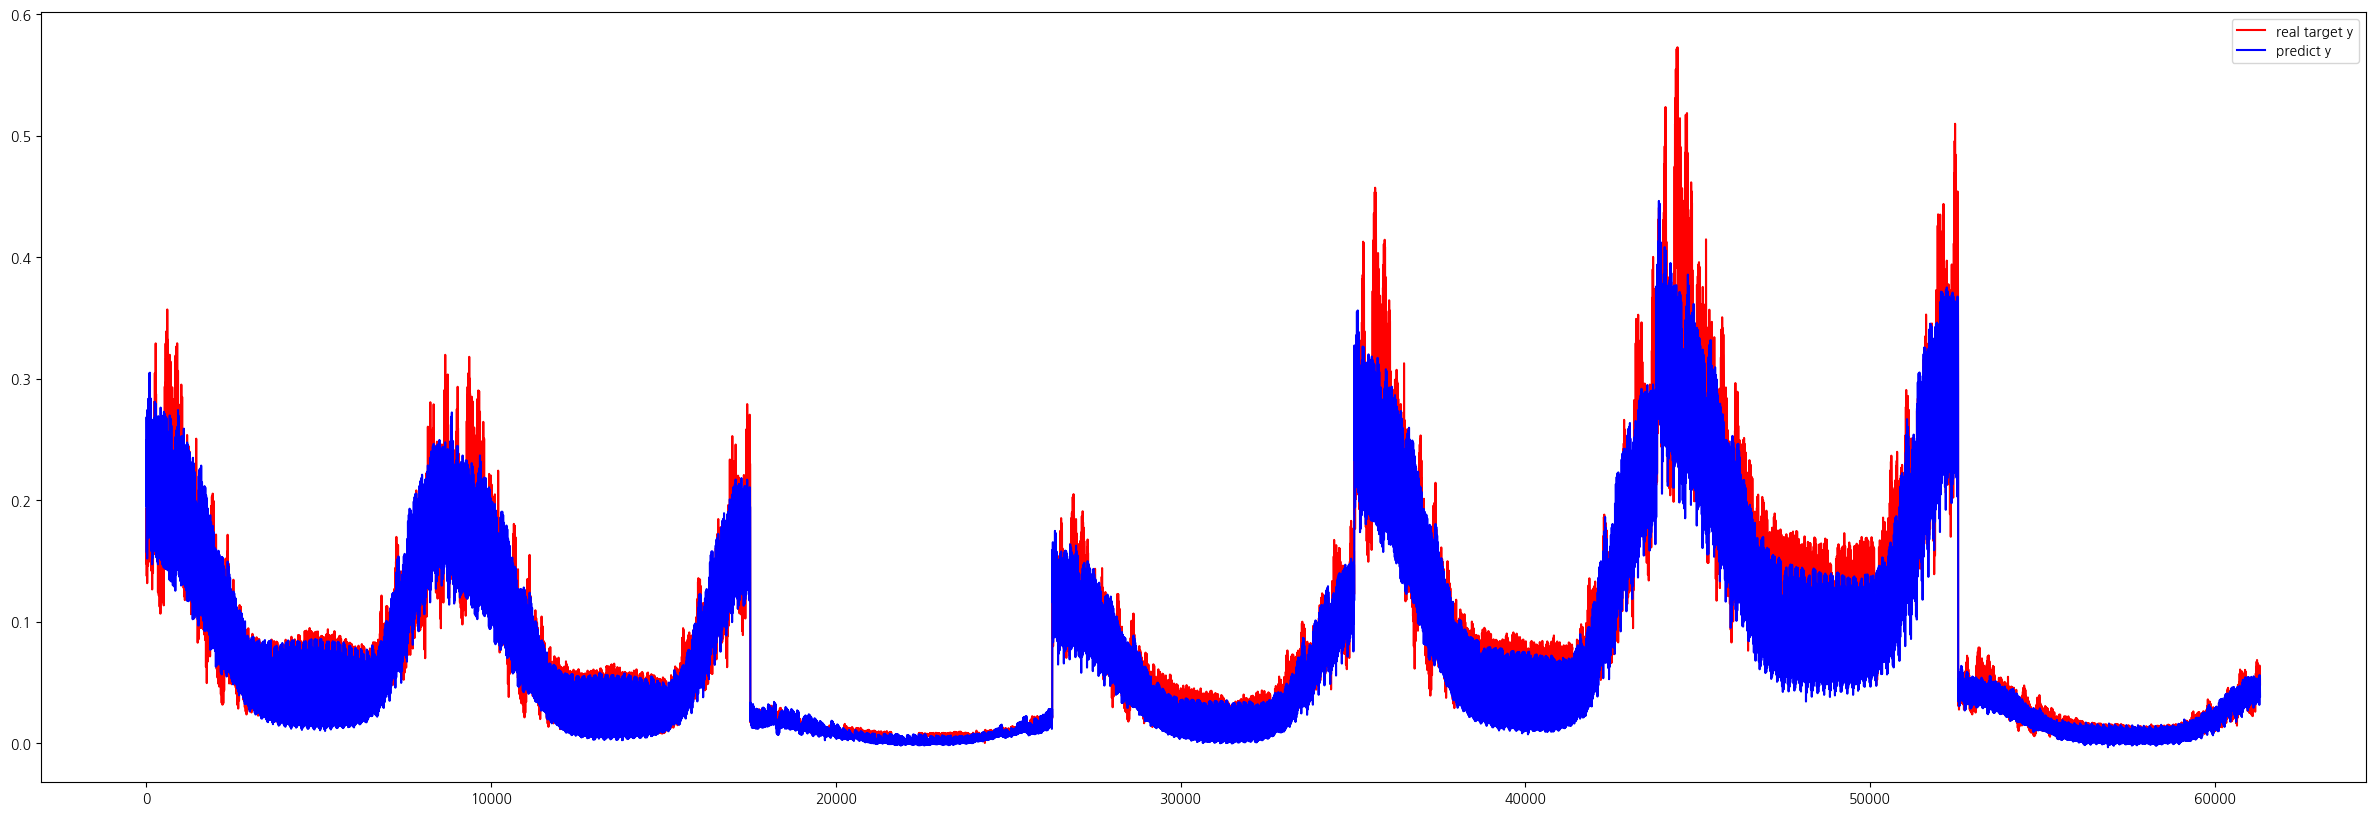

In [122]:
# 실제값, 예측값 비교

plt.figure(figsize=(30, 10))
plt.plot(test_y, color='red', label='real target y')
plt.plot(pred_y4, color='blue', label='predict y')
plt.legend()
plt.show()

### 종합해서 다시 모델 구축

#### - 시퀀스3, layer5, unit40 으로 다시 도전

test MSE 0.0006

test MAE 0.0125

In [123]:
early= EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model4 = Sequential()
model4.add(LSTM(units=40, activation='tanh', return_sequences=True, input_shape=(3,5)))
model4.add(LSTM(units=40, activation='tanh', return_sequences=True))
model4.add(LSTM(units=40, activation='tanh', return_sequences=True))
model4.add(LSTM(units=40, activation='tanh', return_sequences=True))
model4.add(LSTM(units=40, activation='tanh'))
model4.add(Dense(1))

model4.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

model4.fit(train_x, train_y, epochs=100, validation_split=0.2, callbacks=[early])

pred_y4 = model4.predict(test_x)


Epoch 1/100
7670/7670 [==============================] - 71s 8ms/step - loss: 0.0014 - mae: 0.0228 - val_loss: 4.4530e-04 - val_mae: 0.0132
Epoch 2/100
7670/7670 [==============================] - 82s 11ms/step - loss: 4.1554e-04 - mae: 0.0126 - val_loss: 4.8020e-04 - val_mae: 0.0121
Epoch 3/100
7670/7670 [==============================] - 78s 10ms/step - loss: 3.3396e-04 - mae: 0.0112 - val_loss: 4.8751e-04 - val_mae: 0.0130
Epoch 4/100
7670/7670 [==============================] - 85s 11ms/step - loss: 3.1295e-04 - mae: 0.0107 - val_loss: 4.1595e-04 - val_mae: 0.0112
Epoch 5/100
7670/7670 [==============================] - 94s 12ms/step - loss: 3.0352e-04 - mae: 0.0105 - val_loss: 3.7097e-04 - val_mae: 0.0113
Epoch 6/100
7670/7670 [==============================] - 83s 11ms/step - loss: 2.9889e-04 - mae: 0.0103 - val_loss: 4.2095e-04 - val_mae: 0.0112
Epoch 7/100
7670/7670 [==============================] - 84s 11ms/step - loss: 2.7767e-04 - mae: 0.0099 - val_loss: 3.6254e-04 - val_ma

In [124]:
print("test MSE", round(mean_squared_error(test_y, pred_y4), 4))
print("test MAE", round(mean_absolute_error(test_y, pred_y4), 4))

test MSE 0.0006
test MAE 0.0125


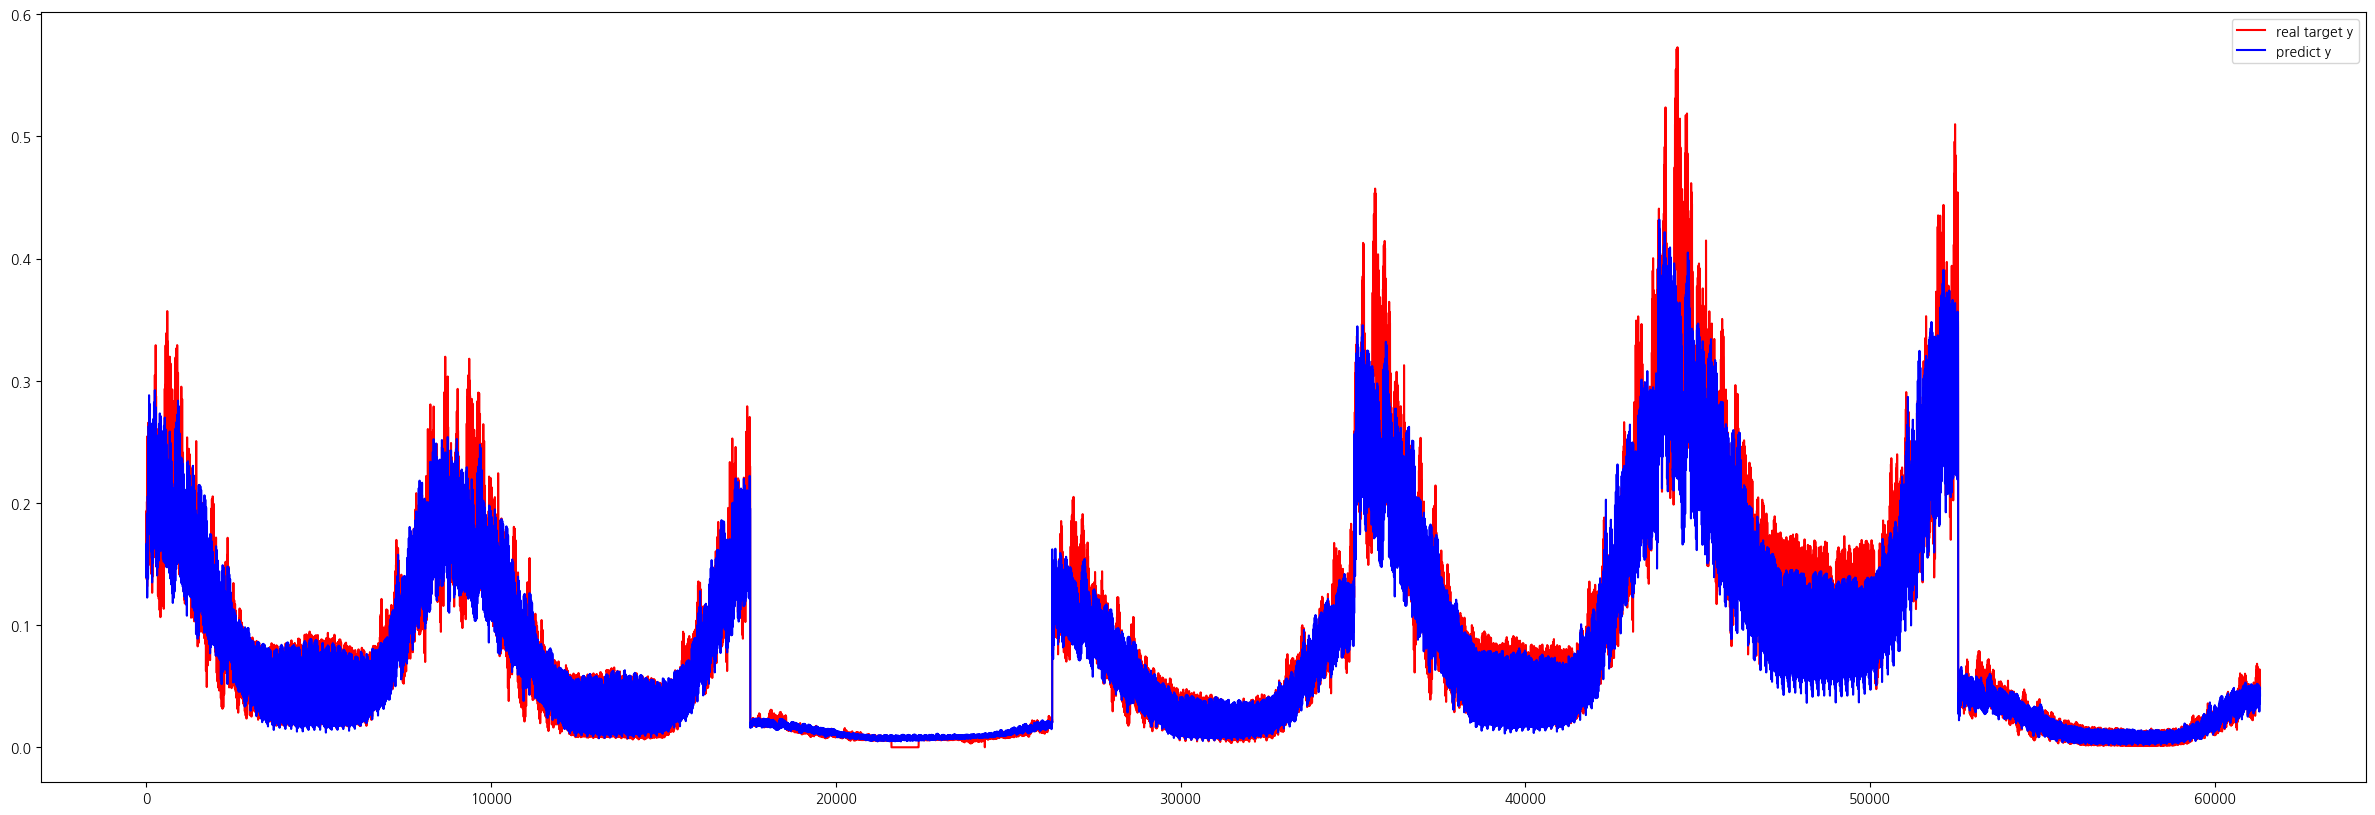

In [125]:
# 실제값, 예측값 비교

plt.figure(figsize=(30, 10))
plt.plot(test_y, color='red', label='real target y')
plt.plot(pred_y4, color='blue', label='predict y')
plt.legend()
plt.show()

#### - 시퀀스7, layer5, unit40 으로 다시 도전

test MSE 0.0005

test MAE 0.0126

In [126]:
x

[[0, 1, 1, 1, 1],
 [0, 1, 1, 1, 2],
 [0, 1, 1, 1, 3],
 [0, 1, 1, 1, 4],
 [0, 1, 1, 1, 5],
 [0, 1, 1, 1, 6],
 [0, 1, 1, 1, 7],
 [0, 1, 1, 1, 8],
 [0, 1, 1, 1, 9],
 [0, 1, 1, 1, 10],
 [0, 1, 1, 1, 11],
 [0, 1, 1, 1, 12],
 [0, 1, 1, 1, 13],
 [0, 1, 1, 1, 14],
 [0, 1, 1, 1, 15],
 [0, 1, 1, 1, 16],
 [0, 1, 1, 1, 17],
 [0, 1, 1, 1, 18],
 [0, 1, 1, 1, 19],
 [0, 1, 1, 1, 20],
 [0, 1, 1, 1, 21],
 [0, 1, 1, 1, 22],
 [0, 1, 1, 1, 23],
 [0, 1, 1, 1, 24],
 [0, 1, 2, 2, 1],
 [0, 1, 2, 2, 2],
 [0, 1, 2, 2, 3],
 [0, 1, 2, 2, 4],
 [0, 1, 2, 2, 5],
 [0, 1, 2, 2, 6],
 [0, 1, 2, 2, 7],
 [0, 1, 2, 2, 8],
 [0, 1, 2, 2, 9],
 [0, 1, 2, 2, 10],
 [0, 1, 2, 2, 11],
 [0, 1, 2, 2, 12],
 [0, 1, 2, 2, 13],
 [0, 1, 2, 2, 14],
 [0, 1, 2, 2, 15],
 [0, 1, 2, 2, 16],
 [0, 1, 2, 2, 17],
 [0, 1, 2, 2, 18],
 [0, 1, 2, 2, 19],
 [0, 1, 2, 2, 20],
 [0, 1, 2, 2, 21],
 [0, 1, 2, 2, 22],
 [0, 1, 2, 2, 23],
 [0, 1, 2, 2, 24],
 [0, 1, 3, 3, 1],
 [0, 1, 3, 3, 2],
 [0, 1, 3, 3, 3],
 [0, 1, 3, 3, 4],
 [0, 1, 3, 3, 5],
 [0, 1, 3, 3, 6]

In [127]:
y

[[2497.129],
 [2363.265],
 [2258.505],
 [2243.969],
 [2344.105],
 [2390.961],
 [2378.457],
 [2518.921],
 [2706.481],
 [2832.057],
 [2895.185],
 [2689.361],
 [2425.537],
 [2254.289],
 [2153.361],
 [2126.969],
 [2210.481],
 [2546.873],
 [2886.097],
 [2863.009],
 [2748.129],
 [2711.441],
 [2586.297],
 [2494.457],
 [2345.481],
 [2185.065],
 [2122.561],
 [2238.889],
 [2475.521],
 [2754.465],
 [3048.713],
 [3544.009],
 [3694.945],
 [3613.873],
 [3541.833],
 [3400.825],
 [3199.089],
 [3105.817],
 [2939.313],
 [2895.625],
 [3011.041],
 [3319.841],
 [3570.289],
 [3618.249],
 [3539.081],
 [3466.113],
 [3374.065],
 [3231.625],
 [2968.249],
 [2711.129],
 [2588.713],
 [2670.473],
 [2873.793],
 [3132.057],
 [3401.065],
 [3852.337],
 [3988.305],
 [3830.545],
 [3727.337],
 [3505.689],
 [3328.513],
 [3191.801],
 [3011.697],
 [2950.841],
 [3079.337],
 [3337.305],
 [3616.721],
 [3678.297],
 [3619.473],
 [3553.129],
 [3402.785],
 [3266.809],
 [3067.361],
 [2795.145],
 [2601.769],
 [2668.673],
 [2863.865],

In [128]:
# LSTM 모델에 맞도록 input 데이터 전처리
# 7일의 데이터로 다음날의 공급량을 예측할 수 있게 전처리

window_size = 7
data_x, data_y = [], []

for i in range(len(y) - window_size):
    _x = x[i:i+window_size]
    _y = y[i+window_size]
    data_x.append(_x)
    data_y.append(_y)


In [134]:
early= EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model4 = Sequential()
model4.add(LSTM(units=40, activation='tanh', return_sequences=True, input_shape=(7,5)))
model4.add(LSTM(units=40, activation='tanh', return_sequences=True))
model4.add(LSTM(units=40, activation='tanh', return_sequences=True))
model4.add(LSTM(units=40, activation='tanh', return_sequences=True))
model4.add(LSTM(units=40, activation='tanh'))
model4.add(Dense(1))

model4.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

model4.fit(train_x, train_y, epochs=100, validation_split=0.2, callbacks=[early])

pred_y4 = model4.predict(test_x)


Epoch 1/100
7670/7670 [==============================] - 127s 15ms/step - loss: 0.0012 - mae: 0.0205 - val_loss: 4.9509e-04 - val_mae: 0.0126
Epoch 2/100
7670/7670 [==============================] - 139s 18ms/step - loss: 3.8018e-04 - mae: 0.0119 - val_loss: 5.1369e-04 - val_mae: 0.0125
Epoch 3/100
7670/7670 [==============================] - 134s 17ms/step - loss: 3.1364e-04 - mae: 0.0108 - val_loss: 4.9751e-04 - val_mae: 0.0135
Epoch 4/100
7670/7670 [==============================] - 134s 17ms/step - loss: 2.8955e-04 - mae: 0.0103 - val_loss: 5.5954e-04 - val_mae: 0.0129
Epoch 5/100
7670/7670 [==============================] - 135s 18ms/step - loss: 2.7775e-04 - mae: 0.0099 - val_loss: 4.5188e-04 - val_mae: 0.0116
Epoch 6/100
7670/7670 [==============================] - 141s 18ms/step - loss: 2.6332e-04 - mae: 0.0096 - val_loss: 4.0606e-04 - val_mae: 0.0116
Epoch 7/100
7670/7670 [==============================] - 133s 17ms/step - loss: 2.5241e-04 - mae: 0.0093 - val_loss: 4.5409e-04 

In [135]:
print("test MSE", round(mean_squared_error(test_y, pred_y4), 4))
print("test MAE", round(mean_absolute_error(test_y, pred_y4), 4))

test MSE 0.0005
test MAE 0.0126


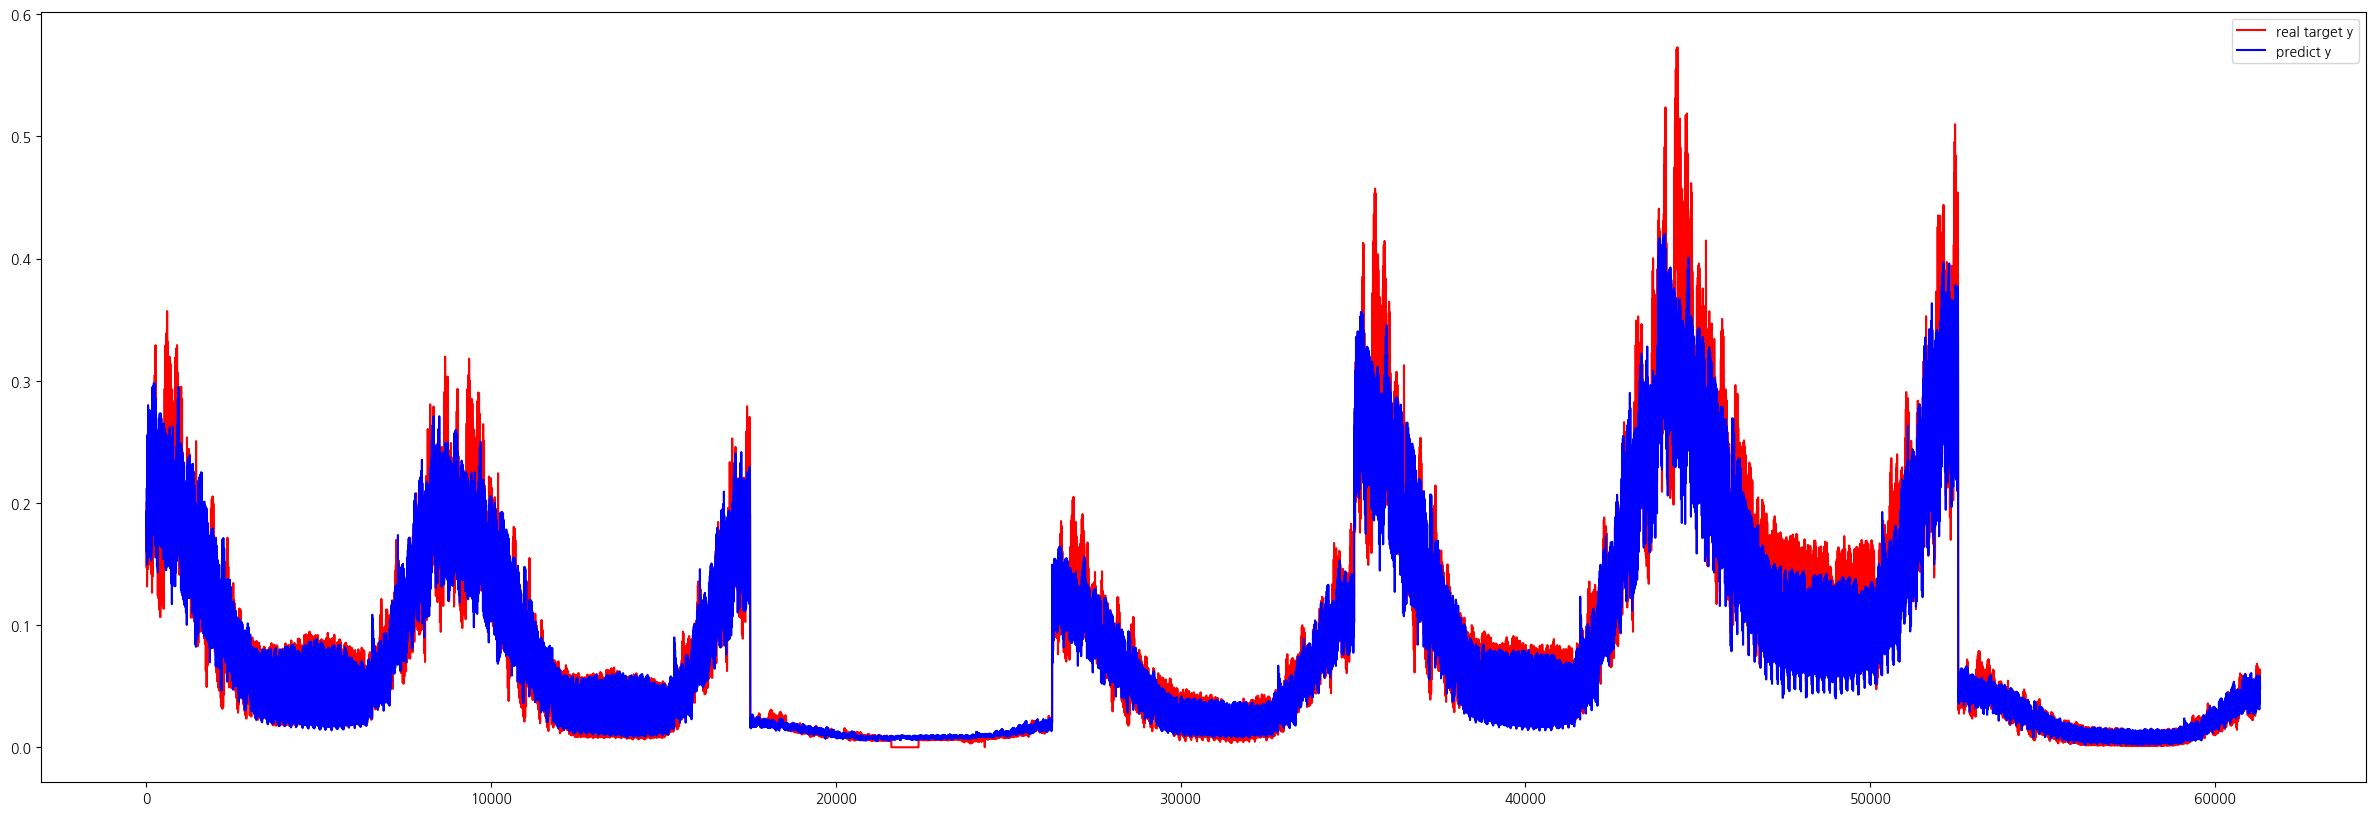

In [136]:
# 실제값, 예측값 비교

plt.figure(figsize=(30, 10))
plt.plot(test_y, color='red', label='real target y')
plt.plot(pred_y4, color='blue', label='predict y')
plt.legend()
plt.show()

### 배치 크기 변경


#### batch 16
seq7, layer5, unit40, batch_size 16

test MSE 0.0006

test MAE 0.0144

In [138]:
early= EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model4 = Sequential()
model4.add(LSTM(units=40, activation='tanh', return_sequences=True, input_shape=(7,5)))
model4.add(LSTM(units=40, activation='tanh', return_sequences=True))
model4.add(LSTM(units=40, activation='tanh', return_sequences=True))
model4.add(LSTM(units=40, activation='tanh', return_sequences=True))
model4.add(LSTM(units=40, activation='tanh'))
model4.add(Dense(1))

model4.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

model4.fit(train_x, train_y, batch_size = 16, epochs=100, validation_split=0.2, callbacks=[early])

pred_y4 = model4.predict(test_x)

Epoch 1/100
15339/15339 [==============================] - 233s 15ms/step - loss: 0.0011 - mae: 0.0196 - val_loss: 4.2290e-04 - val_mae: 0.0124
Epoch 2/100
15339/15339 [==============================] - 267s 17ms/step - loss: 3.6850e-04 - mae: 0.0116 - val_loss: 4.0801e-04 - val_mae: 0.0118
Epoch 3/100
15339/15339 [==============================] - 262s 17ms/step - loss: 3.3099e-04 - mae: 0.0108 - val_loss: 7.1294e-04 - val_mae: 0.0142
Epoch 4/100
15339/15339 [==============================] - 259s 17ms/step - loss: 2.9469e-04 - mae: 0.0101 - val_loss: 5.2754e-04 - val_mae: 0.0124
Epoch 5/100
15339/15339 [==============================] - 244s 16ms/step - loss: 2.6756e-04 - mae: 0.0097 - val_loss: 5.3334e-04 - val_mae: 0.0114
Epoch 6/100
15339/15339 [==============================] - 256s 17ms/step - loss: 2.5577e-04 - mae: 0.0094 - val_loss: 5.3263e-04 - val_mae: 0.0121
Epoch 7/100
1917/1917 [==============================] - 15s 7ms/step


In [139]:
print("test MSE", round(mean_squared_error(test_y, pred_y4), 4))
print("test MAE", round(mean_absolute_error(test_y, pred_y4), 4))

test MSE 0.0006
test MAE 0.0144


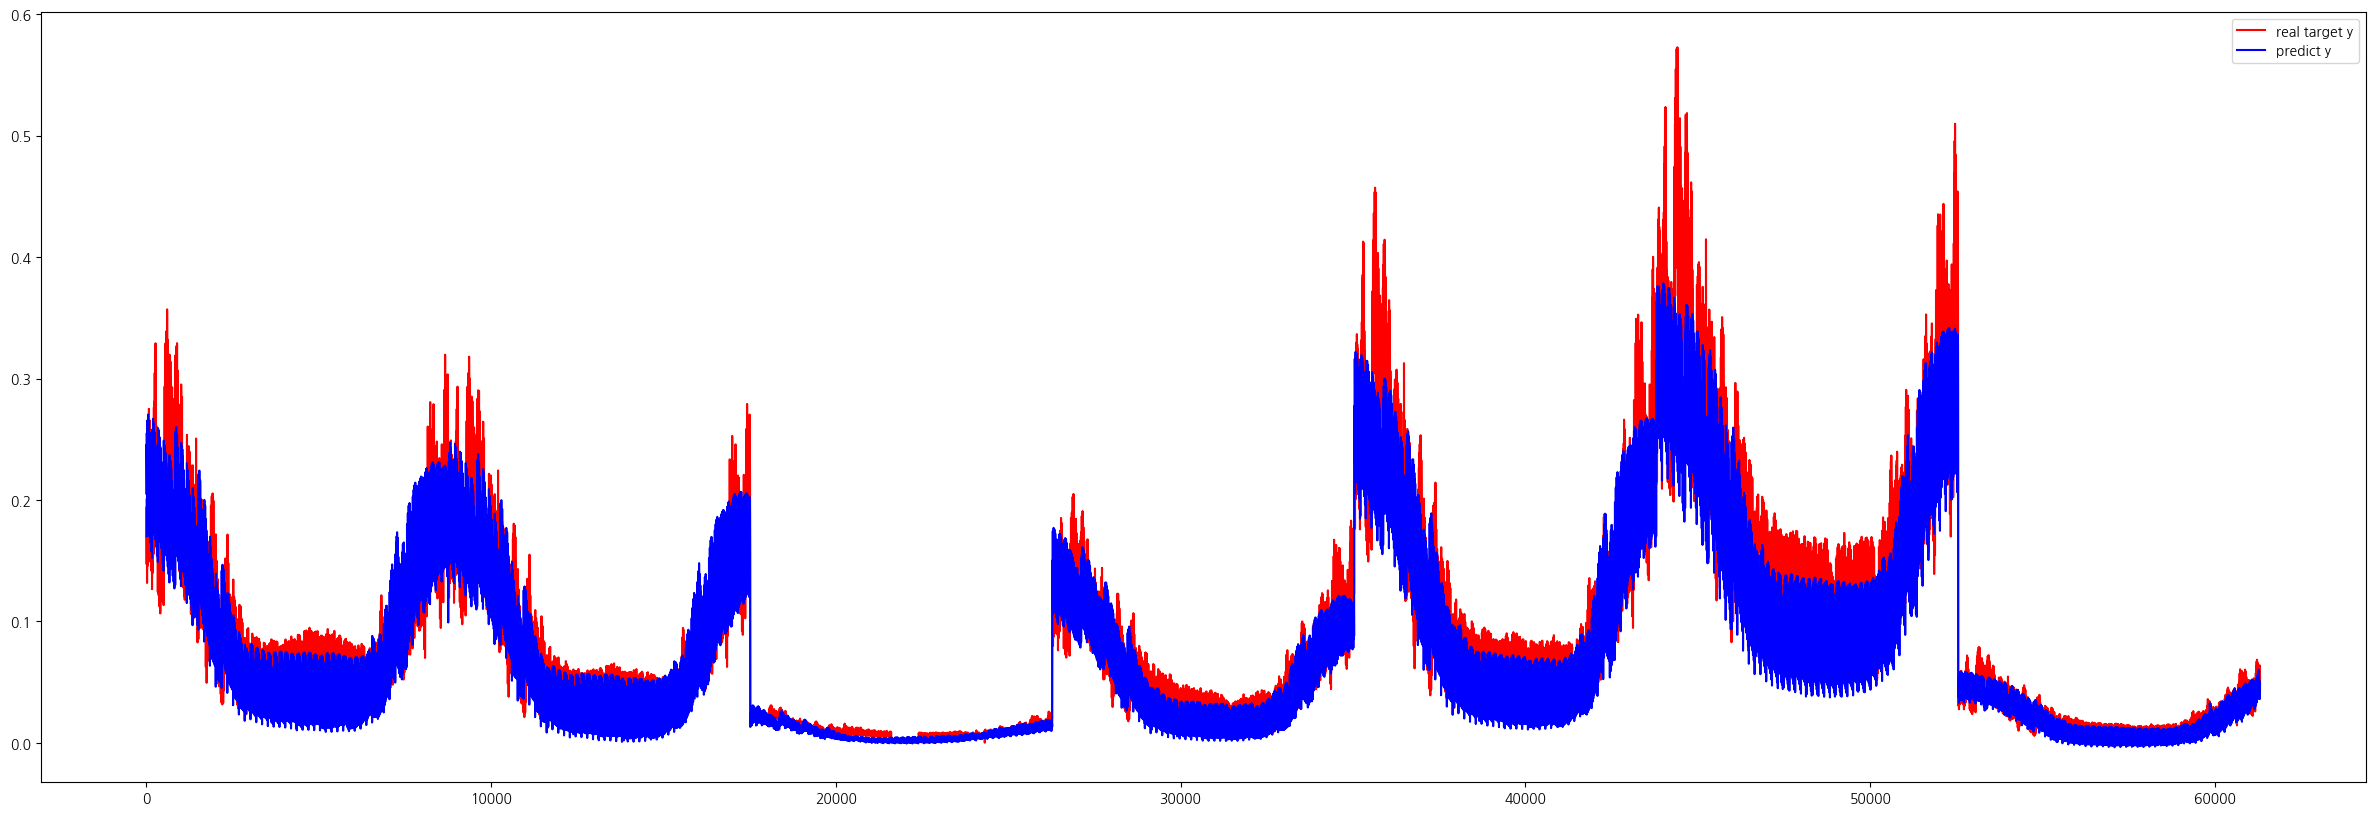

In [140]:
# 실제값, 예측값 비교

plt.figure(figsize=(30, 10))
plt.plot(test_y, color='red', label='real target y')
plt.plot(pred_y4, color='blue', label='predict y')
plt.legend()
plt.show()

#### batchsize 64

seq7, layer5, unit40, batch_size 64

test MSE 0.0006

test MAE 0.013


In [148]:
early= EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model4 = Sequential()
model4.add(LSTM(units=40, activation='tanh', return_sequences=True, input_shape=(7,5)))
model4.add(LSTM(units=40, activation='tanh', return_sequences=True))
model4.add(LSTM(units=40, activation='tanh', return_sequences=True))
model4.add(LSTM(units=40, activation='tanh', return_sequences=True))
model4.add(LSTM(units=40, activation='tanh'))
model4.add(Dense(1))

model4.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

model4.fit(train_x, train_y, batch_size = 64, epochs=100, validation_split=0.2, callbacks=[early])

pred_y4 = model4.predict(test_x)

Epoch 1/100
3835/3835 [==============================] - 76s 17ms/step - loss: 0.0013 - mae: 0.0225 - val_loss: 5.5939e-04 - val_mae: 0.0134
Epoch 2/100
3835/3835 [==============================] - 81s 21ms/step - loss: 3.8962e-04 - mae: 0.0122 - val_loss: 4.7845e-04 - val_mae: 0.0135
Epoch 3/100
3835/3835 [==============================] - 77s 20ms/step - loss: 3.2784e-04 - mae: 0.0112 - val_loss: 5.7971e-04 - val_mae: 0.0139
Epoch 4/100
3835/3835 [==============================] - 81s 21ms/step - loss: 3.1739e-04 - mae: 0.0107 - val_loss: 4.5078e-04 - val_mae: 0.0122
Epoch 5/100
3835/3835 [==============================] - 81s 21ms/step - loss: 2.8806e-04 - mae: 0.0101 - val_loss: 4.8477e-04 - val_mae: 0.0130
Epoch 6/100
3835/3835 [==============================] - 76s 20ms/step - loss: 2.7087e-04 - mae: 0.0098 - val_loss: 5.2375e-04 - val_mae: 0.0127
Epoch 7/100
3835/3835 [==============================] - 80s 21ms/step - loss: 2.6549e-04 - mae: 0.0096 - val_loss: 4.3989e-04 - val_m

In [149]:
print("test MSE", round(mean_squared_error(test_y, pred_y4), 4))
print("test MAE", round(mean_absolute_error(test_y, pred_y4), 4))

test MSE 0.0006
test MAE 0.013


In [ ]:
# 실제값, 예측값 비교

plt.figure(figsize=(30, 10))
plt.plot(test_y, color='red', label='real target y')
plt.plot(pred_y4, color='blue', label='predict y')
plt.legend()
plt.show()